# Strategie ewolucyjne

Notebook pokazuje podstawowe mechanizmy strategii ewolucyjnych.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline

## Przykładowe problemy testowe

In [6]:
# Sphere function (minimum at 0)
def objective_function_F1(X):
    return - np.sum(X**2, axis=1)

# Sphere function - modified
def objective_function_F1a(X):
    return - (X[:, 0]**2 + 9*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1b(X):
    return - (X[:, 0]**2 + 625*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1c(X):
    return - (X[:, 0]**2 + 2*X[:, 1]**2 - 2 * X[:, 0] * X[:, 1])

In [7]:
# Rastrigin function (minimum at 0)
def objective_function_F6(X):
    return - 10.0 * X.shape[1] - np.sum(X**2, axis=1) + 10.0 * np.sum(np.cos(2 * np.pi * X), axis=1)

In [8]:
# Schwefel function (minimum at 420.9687)
# (REMARK: should be considered only on [-500, 500]^d, because there are better minima outside)
def objective_function_F7(X):
    return -(418.9829 * X.shape[1] - np.sum(X * np.sin(np.sqrt(np.abs(X))), axis=1))

In [9]:
# Griewank function (minimum at 0)
def objective_function_F8(X):
    return - 1 - np.sum(X**2 / 4000, axis=1) + np.prod(np.cos(X / np.sqrt(np.linspace(1, X.shape[1], X.shape[1]))), axis=1)

In [10]:
def plot_3D_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(12, 8))
    ax = plt.gca(projection='3d')
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, linewidth=0, antialiased=True)
    plt.title(title)
    plt.show()

In [11]:
def plot_contour_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(9, 9))
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    plt.contour(X, Y, Z, 50)
    plt.title(title)
    plt.show()

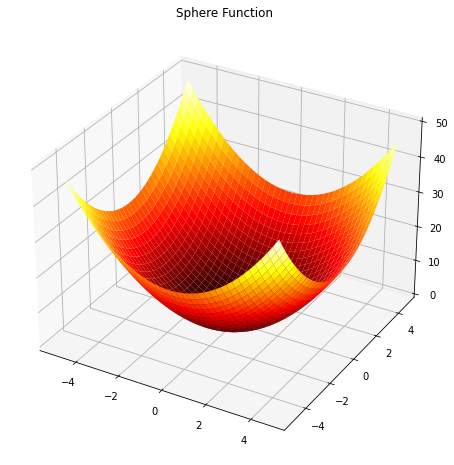

In [12]:
plot_3D_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

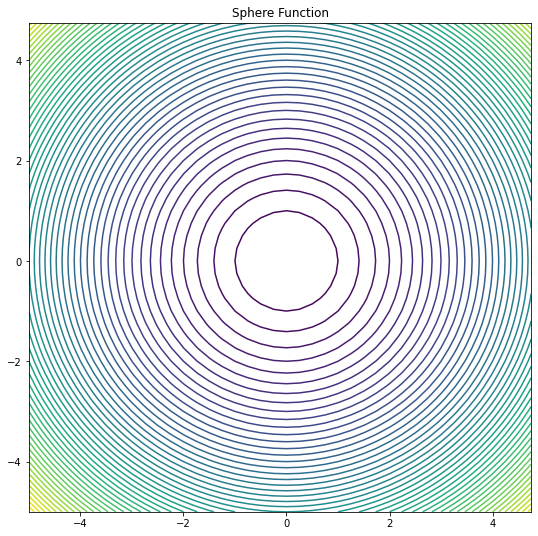

In [13]:
plot_contour_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

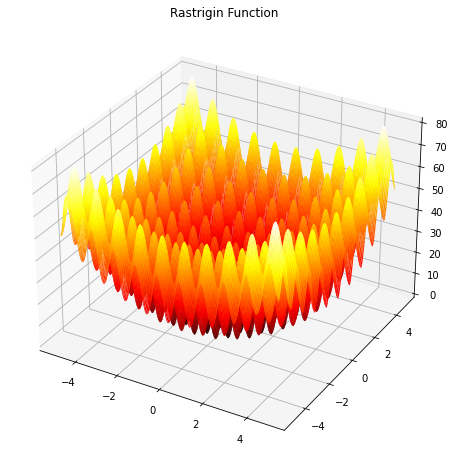

In [14]:
plot_3D_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

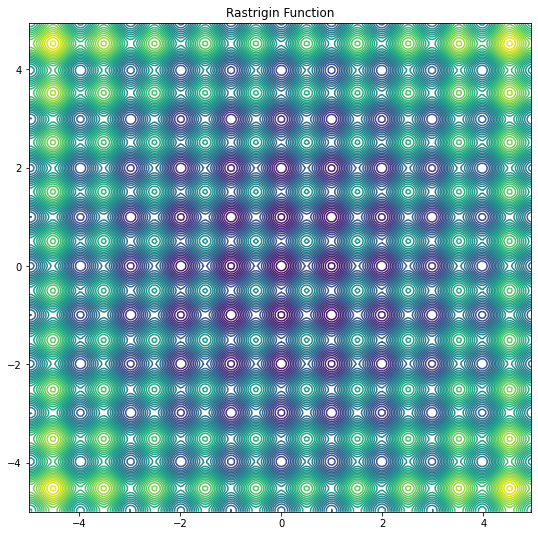

In [15]:
plot_contour_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

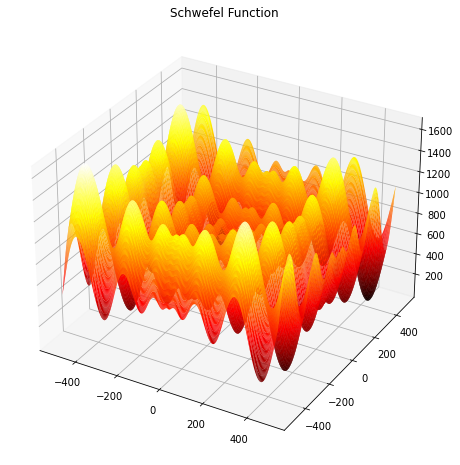

In [16]:
plot_3D_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

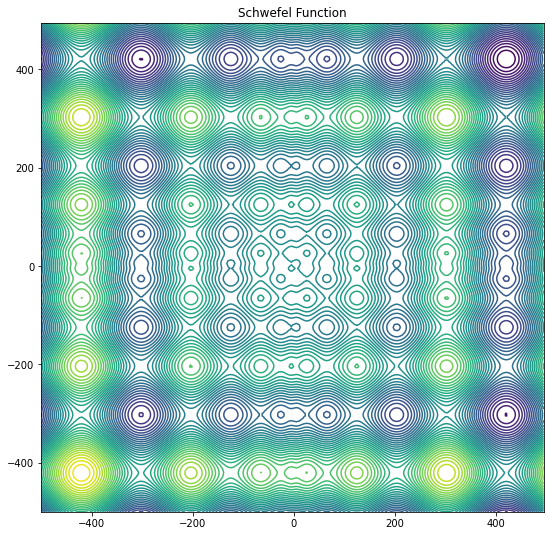

In [17]:
plot_contour_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

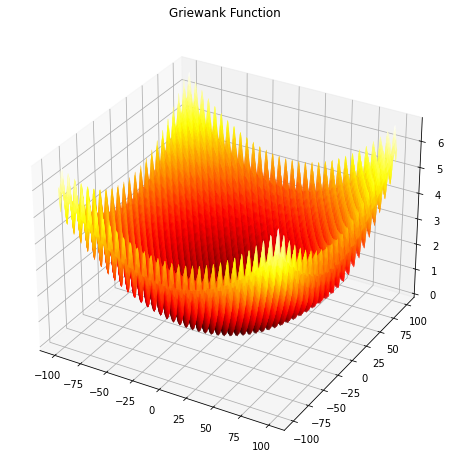

In [18]:
plot_3D_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

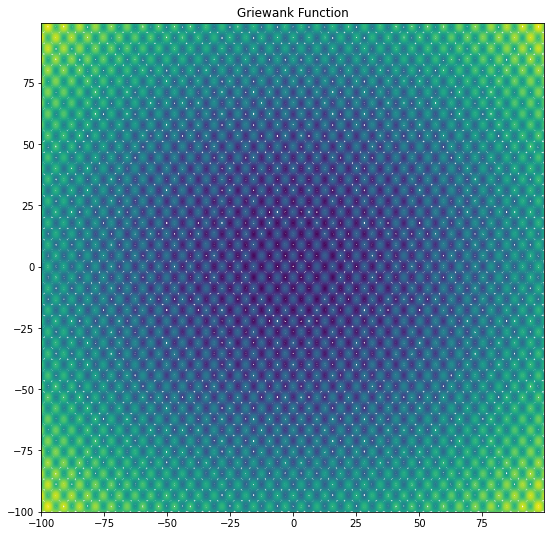

In [19]:
plot_contour_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

## Przykładowe modele mutacji

In [20]:
N = 250
d = 2

objective_function = objective_function_F1a

original_individual = np.array([[1, 1]])

### Przykład 1:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma^2)$, zaś $\sigma$ jest taka sama dla wszystkich $i = 1, 2, \ldots, d$

In [21]:
sigma = 0.25
mutations = original_individual + sigma * np.random.randn(N, d)

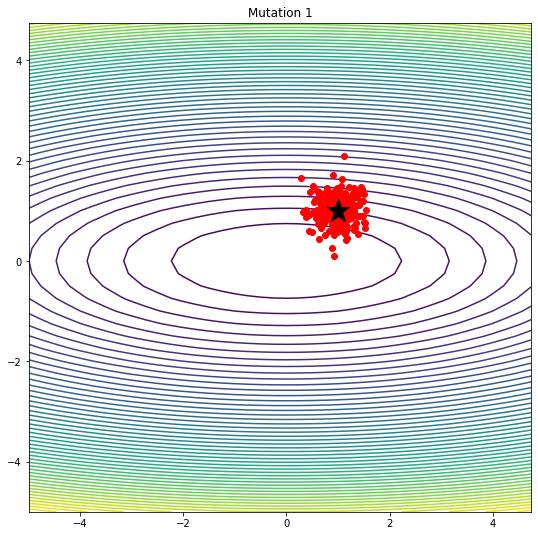

In [22]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 1')
plt.show()

### Przykład 2:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma_i^2)$, zaś $\sigma_i$ może być różna dla różnych $i = 1, 2, \ldots, d$

In [23]:
sigma = np.array([0.25, 0.5])
mutations = original_individual + sigma * np.random.randn(N, d)

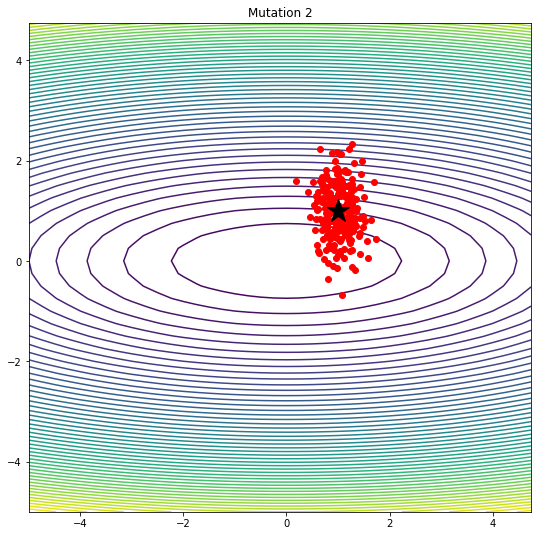

In [24]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 2')
plt.show()

### Przykład 3:

$\mathbf{x} = \mathbf{x} + \boldsymbol{\varepsilon}$, gdzie $\boldsymbol{\varepsilon}$ ma wielowymiarowy rozkład normalny $\mathcal{N}(\mathbf{0}, \boldsymbol{\Sigma})$

In [25]:
np.random.randn(10, d)

array([[ 2.27132019, -2.38453564],
       [-0.10027786, -0.0350017 ],
       [ 1.4995791 , -0.80836326],
       [-0.13033831,  0.98940641],
       [-1.59247812,  0.56799254],
       [ 1.10731696,  0.38803314],
       [-0.79758961, -0.10076804],
       [ 0.02157735,  0.74668696],
       [-0.04669749,  0.3752705 ],
       [ 0.22268973, -1.53256189]])

In [26]:
S = np.array([[0.25, 0.25],[0.25, 0.5]])

In [27]:
np.linalg.cholesky(S).T

array([[0.5, 0.5],
       [0. , 0.5]])

In [28]:
np.linalg.cholesky(S).T

array([[0.5, 0.5],
       [0. , 0.5]])

In [29]:
np.dot(np.random.randn(10, d), np.linalg.cholesky(S).T)

array([[-0.00890714, -0.52587045],
       [-1.05948266, -1.24088842],
       [-0.11785812, -0.15250095],
       [-0.32208744, -0.43793093],
       [ 0.15065443, -0.22372002],
       [ 0.61314536,  1.0192455 ],
       [-0.13350811,  0.16380348],
       [-0.3144405 , -0.61540944],
       [-0.55479973, -0.03373463],
       [-0.21323673,  0.2769609 ]])

In [30]:
np.dot(np.random.randn(1, d), np.linalg.cholesky(S).T)

array([[-0.12746787, -0.5998901 ]])

In [31]:
S = np.array([[0.25, 0.25],[0.25, 0.5]])
mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)

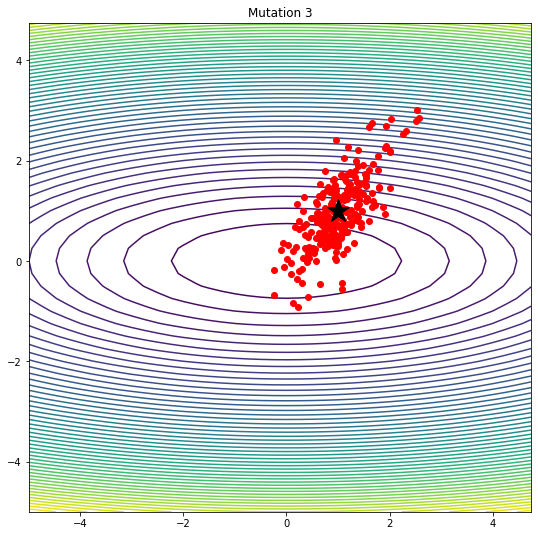

In [32]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 3')
plt.show()

## Przykładowa strategia ewolucyjna

In [33]:
def es(objective_function, chromosome_length, population_size, 
       number_of_iterations, number_of_offspring, number_of_parents, 
       sigma, tau, tau_0, log_frequency=1, var_range = (0, 0), fix_out_of_range = False, mutation_fun = None):

    if fix_out_of_range:
        fixing_val = abs(var_range[1] - var_range[0]) / 10
    
    best_solution = np.empty((1, chromosome_length))
    best_solution_objective_value = 0.00

    log_objective_values = np.empty((number_of_iterations, 4))
    log_best_solutions = np.empty((number_of_iterations, chromosome_length))
    log_best_sigmas = np.empty((number_of_iterations, chromosome_length))

    # generating an initial population
    current_population_solutions = 100.0 * np.random.rand(population_size, chromosome_length)
    current_population_sigmas = sigma * np.ones((population_size, chromosome_length))

    # evaluating the objective function on the current population
    current_population_objective_values = objective_function(current_population_solutions)

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = current_population_objective_values - current_population_objective_values.min()
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = 1.0 / population_size * np.ones(population_size)
        parent_indices = np.random.choice(population_size, (number_of_offspring, number_of_parents), True, fitness_values).astype(np.int64)

        # creating the children population by Global Intermediere Recombination
        children_population_solutions = np.zeros((number_of_offspring, chromosome_length))
        children_population_sigmas = np.zeros((number_of_offspring, chromosome_length))
        for i in range(number_of_offspring):
            #parent_indices[i, :] are indices of parents used to create single child 
            children_population_solutions[i, :] = current_population_solutions[parent_indices[i, :], :].mean(axis=0)
            children_population_sigmas[i, :] = current_population_sigmas[parent_indices[i, :], :].mean(axis=0)

            
        children_population_sigmas = (children_population_sigmas * 
                                      np.exp(tau * np.random.randn(number_of_offspring, chromosome_length) + 
                                             tau_0 * np.random.randn(number_of_offspring, 1)))
        if mutation_fun == None:
            # mutating the children population by adding random gaussian noise
            children_population_solutions = (children_population_solutions + 
                                             children_population_sigmas * 
                                             np.random.randn(number_of_offspring, chromosome_length))
        else:
            children_population_solutions = mutation_fun(children_population_solutions,children_population_sigmas,
                                                         number_of_offspring, chromosome_length)

        # if we want to fix variables that went out of the function's domain
        if fix_out_of_range:
            children_population_solutions = np.where(children_population_solutions < var_range[0],
                                                     children_population_solutions,
                                                     var_range[0] + fixing_val * np.random.rand())
            children_population_solutions = np.where(children_population_solutions > var_range[1],
                                                     children_population_solutions,
                                                     var_range[1] - fixing_val * np.random.rand())
    
    
        # evaluating the objective function on the children population
        children_population_objective_values = objective_function(children_population_solutions)

        # replacing the current population by (Mu + Lambda) Replacement
        current_population_objective_values = np.hstack([current_population_objective_values, children_population_objective_values])
        current_population_solutions = np.vstack([current_population_solutions, children_population_solutions])
        current_population_sigmas = np.vstack([current_population_sigmas, children_population_sigmas])

        I = np.argsort(current_population_objective_values)[::-1]
        current_population_solutions = current_population_solutions[I[:population_size], :]
        current_population_sigmas = current_population_sigmas[I[:population_size], :]
        current_population_objective_values = current_population_objective_values[I[:population_size]]

        # recording some statistics
        if best_solution_objective_value < current_population_objective_values[0]:
            best_solution = current_population_solutions[0, :]
            best_solution_objective_value = current_population_objective_values[0]
        log_objective_values[t, :] = [current_population_objective_values.min(), current_population_objective_values.max(), current_population_objective_values.mean(), current_population_objective_values.std()]
        log_best_solutions[t, :] = current_population_solutions[0, :]
        log_best_sigmas[t, :] = current_population_sigmas[0, :]

        if np.mod(t, log_frequency) == 0 or t == number_of_iterations - 1:
            print("Iteration %04d : best score = %0.8f, mean score = %0.8f." % (t, log_objective_values[:t+1, 1].max(), log_objective_values[t, 2]))

    return best_solution_objective_value, best_solution, log_objective_values, log_best_solutions, log_best_sigmas

### Działanie strategii ewolucyjnej dla funkcji sferycznej F1

Iteration 0000 : best score = -6588.23335727, mean score = -26256.66950415.
Iteration 0010 : best score = -38.19776717, mean score = -243.77781049.
Iteration 0020 : best score = -0.07470749, mean score = -0.63141869.
Iteration 0030 : best score = -0.00022804, mean score = -0.00142451.
Iteration 0040 : best score = -0.00000041, mean score = -0.00000323.
Iteration 0050 : best score = -0.00000000, mean score = -0.00000001.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0099 : best score = -0.00000000, mean score = -0.00000000.


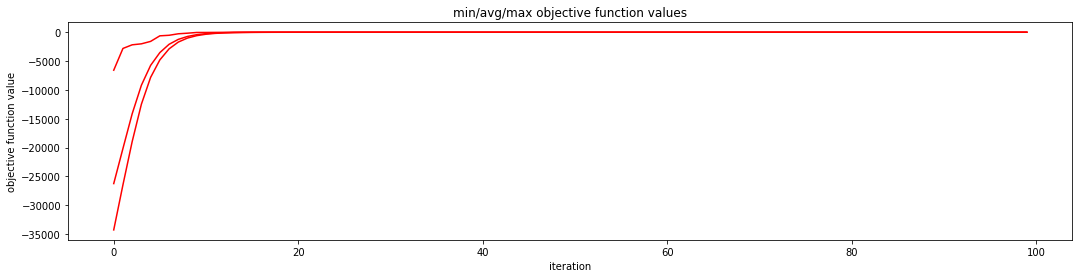

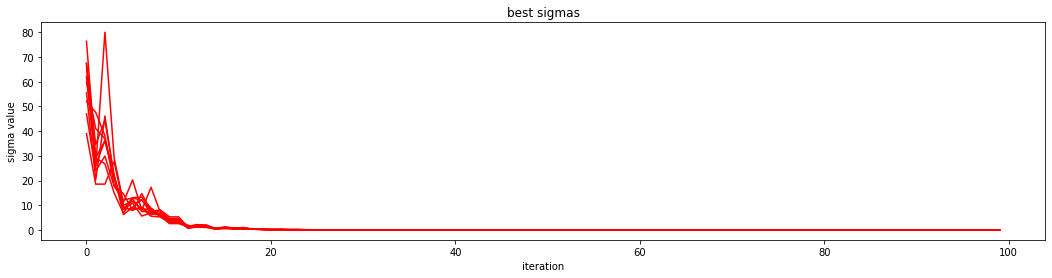

In [607]:
d = 10
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

### Działanie strategii ewolucyjnej dla funkcji Rastrigina F6

Iteration 0000 : best score = -104269.87323350, mean score = -166714.59960326.
Iteration 0100 : best score = -317.83503301, mean score = -437.99475185.
Iteration 0200 : best score = -303.42638338, mean score = -395.85448645.
Iteration 0300 : best score = -293.37661439, mean score = -382.59190427.
Iteration 0400 : best score = -293.37661439, mean score = -374.28563623.
Iteration 0500 : best score = -293.37661439, mean score = -368.47336327.
Iteration 0600 : best score = -270.46149858, mean score = -360.96200873.
Iteration 0700 : best score = -23.87901777, mean score = -23.87901808.
Iteration 0800 : best score = -23.87901737, mean score = -23.87901737.
Iteration 0900 : best score = -23.87901737, mean score = -23.87901737.
Iteration 0999 : best score = -23.87901737, mean score = -23.87901737.


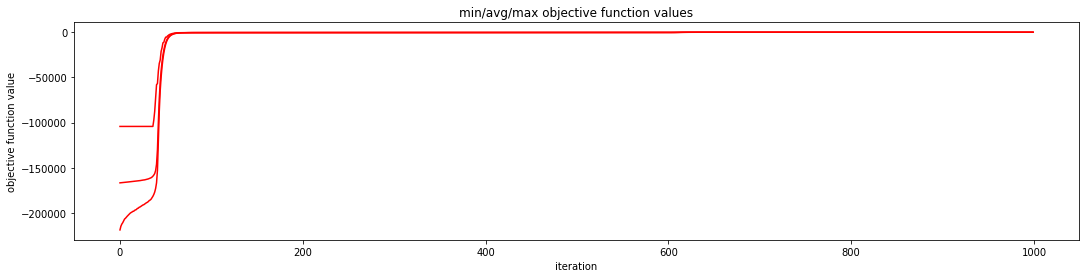

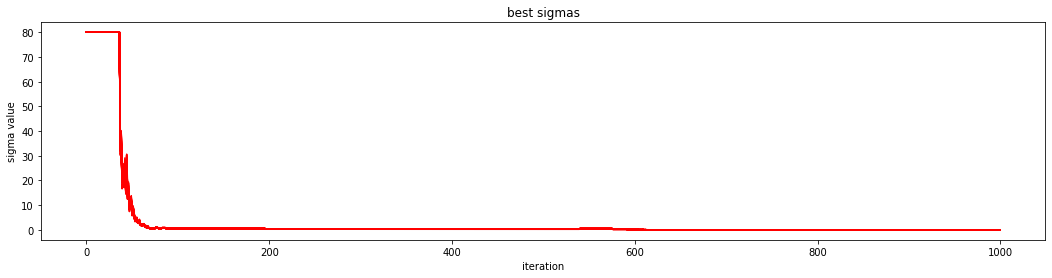

In [608]:
d = 50
N = 2000
T = 1000

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 80.0, 0.6/np.sqrt(2*d), 0.6/np.sqrt(2*np.sqrt(d)), 100)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

### Działanie strategii ewolucyjnej dla funkcji Griewanka F8

Iteration 0000 : best score = -2.44372322, mean score = -7.64955972.
Iteration 0010 : best score = -0.72334477, mean score = -1.04571594.
Iteration 0020 : best score = -0.02575472, mean score = -0.32301845.
Iteration 0030 : best score = -0.00022970, mean score = -0.00127834.
Iteration 0040 : best score = -0.00000058, mean score = -0.00000392.
Iteration 0050 : best score = -0.00000000, mean score = -0.00000001.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = 0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = 0.00000000, mean score = 0.00000000.
Iteration 0099 : best score = 0.00000000, mean score = 0.00000000.


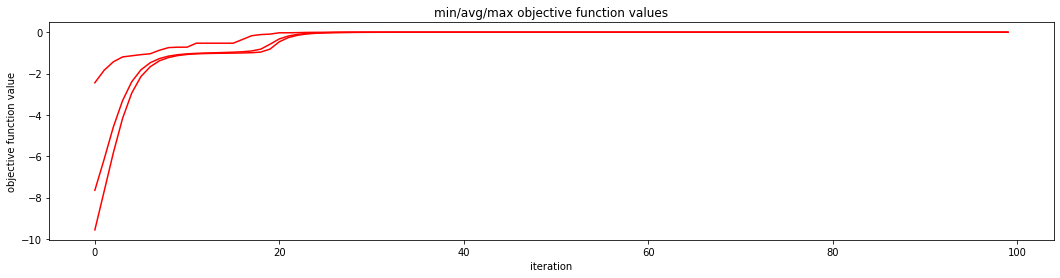

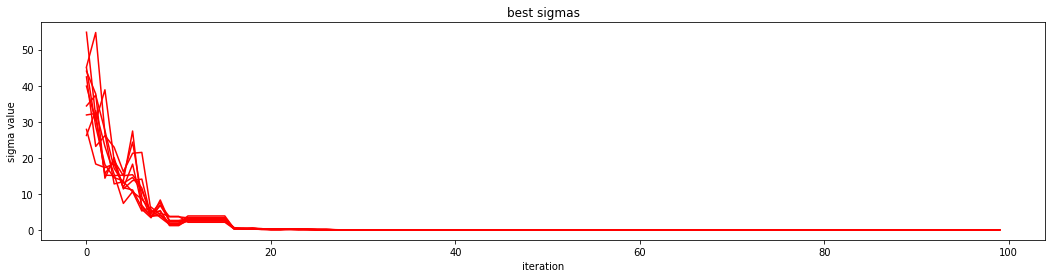

In [139]:
d = 10
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F8, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

### Działanie strategii ewolucyjnej dla funkcji Schwefel F7

Iteration 0000 : best score = -183.27332751, mean score = -183.27332751.
Iteration 0010 : best score = -82.46500746, mean score = -82.46500746.
Iteration 0020 : best score = -0.07056385, mean score = -0.07056385.
Iteration 0030 : best score = -0.07056385, mean score = -0.07056385.
Iteration 0040 : best score = -0.07056385, mean score = -0.07056385.
Iteration 0050 : best score = -0.07056385, mean score = -0.07056385.
Iteration 0060 : best score = -0.07056385, mean score = -0.07056385.
Iteration 0070 : best score = -0.07056385, mean score = -0.07056385.
Iteration 0080 : best score = -0.07056385, mean score = -0.07056385.
Iteration 0090 : best score = -0.00404005, mean score = -0.00404005.
Iteration 0099 : best score = -0.00404005, mean score = -0.00404005.


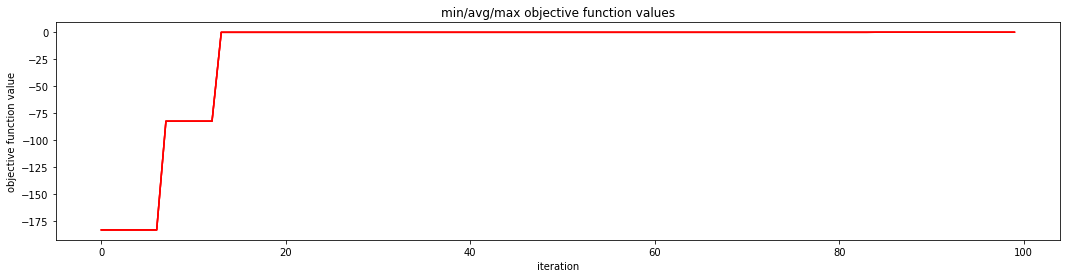

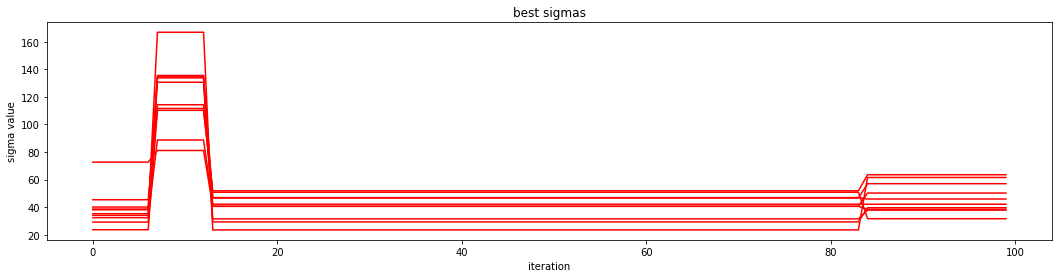

In [178]:
d = 10
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10, [-500, 500], True)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

In [150]:
objective_function_F7(np.array([[-2.79095997e+01,  8.25633827*10**4]]))

array([82810.68244588])

In [ ]:
[ 3.88661946e+01  1.47526504e+02]

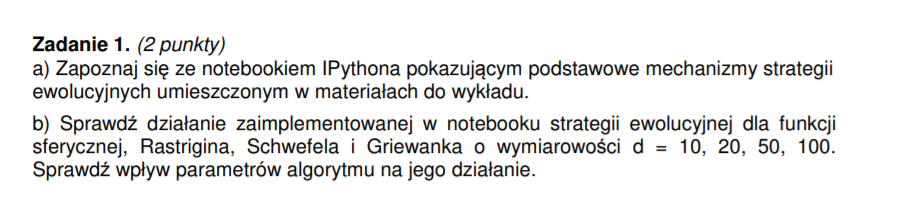

In [40]:
N = 2000
ds = [10, 20, 50, 100]
iters = [200, 400, 1000, 2000]
log_freqs = [100, 200, 250, 400]
Ks = [0.52, 0.6, 0.8, 1.0, 1.2]
sigmas = [50.0, 80.0]
# F1 - sphere, F7 - schwefel, F
obj_functions = {'Sphere': objective_function_F1, 'Rastrigin': objective_function_F6, 
                 'Schwefel': objective_function_F7, 'Griewank': objective_function_F8}

for function_name in obj_functions:
    print(function_name, end = "\n\n")
    for K in Ks:
        print("K = ", K, end = "\n\n")
        for sigma in sigmas:
            print("Sigma = ", sigma, end = "\n\n")
            for i in range(len(ds)):
                d = ds[i]
                T = iters[i]
                log_freq = log_freqs[i]

                if function_name == 'Schwefel':
                    var_range = [-500, 500]
                    fix_out_of_range = True
                else:
                    var_range = [0, 0]
                    fix_out_of_range = False

                print(f"{function_name}, K = {K}, d = {d}, iterations = {T}, sigma = {sigma}")
                best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
                    obj_functions[function_name], d, N, T, 2*N, 2, sigma, K/np.sqrt(2*d), K/np.sqrt(2*np.sqrt(d)), log_freq,
                    var_range, fix_out_of_range)
                print("")
            print("")
        print("")
    print("\n\n")

Sphere

K =  0.52

Sigma =  50.0

Sphere, K = 0.52, d = 10, iterations = 200, sigma = 50.0
Iteration 0000 : best score = -4512.48490627, mean score = -26359.98697415.
Iteration 0100 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0199 : best score = -0.00000000, mean score = -0.00000000.

Sphere, K = 0.52, d = 20, iterations = 400, sigma = 50.0
Iteration 0000 : best score = -27749.93766012, mean score = -60577.74741819.
Iteration 0200 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0399 : best score = -0.00000000, mean score = -0.00000000.

Sphere, K = 0.52, d = 50, iterations = 1000, sigma = 50.0
Iteration 0000 : best score = -92279.17448679, mean score = -162303.41876349.
Iteration 0250 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0500 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0750 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0999 : best score = -0.00000000, mean score = -0.00000000.

Sphere, 

Iteration 0999 : best score = -0.00000000, mean score = -0.00000000.

Sphere, K = 0.8, d = 100, iterations = 2000, sigma = 80.0
Iteration 0000 : best score = -244143.45757050, mean score = -333432.69447293.
Iteration 0400 : best score = -0.00000524, mean score = -0.00000608.
Iteration 0800 : best score = -0.00000000, mean score = -0.00000000.
Iteration 1200 : best score = -0.00000000, mean score = -0.00000000.
Iteration 1600 : best score = -0.00000000, mean score = -0.00000000.
Iteration 1999 : best score = -0.00000000, mean score = -0.00000000.



K =  1.0

Sigma =  50.0

Sphere, K = 1.0, d = 10, iterations = 200, sigma = 50.0
Iteration 0000 : best score = -7325.17593668, mean score = -26116.23985562.
Iteration 0100 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0199 : best score = -0.00000000, mean score = -0.00000000.

Sphere, K = 1.0, d = 20, iterations = 400, sigma = 50.0
Iteration 0000 : best score = -19709.49362240, mean score = -59911.16880987.
Iteration 0200 :

Iteration 0200 : best score = -68.28784201, mean score = -121.57166686.
Iteration 0399 : best score = -54.45392546, mean score = -110.79272042.

Rastrigin, K = 0.52, d = 50, iterations = 1000, sigma = 80.0
Iteration 0000 : best score = -94662.02882005, mean score = -166821.79164772.
Iteration 0250 : best score = -287.40541473, mean score = -387.02748672.
Iteration 0500 : best score = -287.40541473, mean score = -366.77939060.
Iteration 0750 : best score = -279.42027040, mean score = -357.17464596.
Iteration 0999 : best score = -274.54723966, mean score = -351.44591429.

Rastrigin, K = 0.52, d = 100, iterations = 2000, sigma = 80.0
Iteration 0000 : best score = -234814.32247066, mean score = -335424.49538906.
Iteration 0400 : best score = -234814.32247066, mean score = -334862.02308422.
Iteration 0800 : best score = -42775.98605222, mean score = -68952.81429105.
Iteration 1200 : best score = -737.51916953, mean score = -866.06079647.
Iteration 1600 : best score = -58.70256928, mean scor

Iteration 0400 : best score = -408.92735278, mean score = -408.92735385.
Iteration 0800 : best score = -408.92734545, mean score = -408.92734545.
Iteration 1200 : best score = -408.92734545, mean score = -408.92734545.
Iteration 1600 : best score = -408.92734545, mean score = -408.92734545.
Iteration 1999 : best score = -408.92734545, mean score = -408.92734545.


Sigma =  80.0

Rastrigin, K = 1.0, d = 10, iterations = 200, sigma = 80.0
Iteration 0000 : best score = -6548.31461263, mean score = -29406.23142428.
Iteration 0100 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0199 : best score = 0.00000000, mean score = 0.00000000.

Rastrigin, K = 1.0, d = 20, iterations = 400, sigma = 80.0
Iteration 0000 : best score = -27308.77142666, mean score = -64594.09602395.
Iteration 0200 : best score = -16.91430397, mean score = -16.91430397.
Iteration 0399 : best score = -16.91430397, mean score = -16.91430397.

Rastrigin, K = 1.0, d = 50, iterations = 1000, sigma = 80.0
Iterati

Iteration 0200 : best score = -0.00025464, mean score = -0.00025464.
Iteration 0399 : best score = -0.00025464, mean score = -0.00025464.

Schwefel, K = 0.6, d = 50, iterations = 1000, sigma = 50.0
Iteration 0000 : best score = -233.74346489, mean score = -233.74346489.
Iteration 0250 : best score = -0.00475110, mean score = -0.00475110.
Iteration 0500 : best score = -0.00475110, mean score = -0.00475110.
Iteration 0750 : best score = -0.00475110, mean score = -0.00475110.
Iteration 0999 : best score = -0.00475110, mean score = -0.00475110.

Schwefel, K = 0.6, d = 100, iterations = 2000, sigma = 50.0
Iteration 0000 : best score = -967.67283168, mean score = -967.67283168.
Iteration 0400 : best score = -0.08676878, mean score = -0.08676878.
Iteration 0800 : best score = -0.01068268, mean score = -0.01068268.
Iteration 1200 : best score = -0.00367493, mean score = -0.00367493.
Iteration 1600 : best score = -0.00128227, mean score = -0.00128227.
Iteration 1999 : best score = -0.00128227, 

Iteration 1999 : best score = -0.00157314, mean score = -0.00157314.



K =  1.2

Sigma =  50.0

Schwefel, K = 1.2, d = 10, iterations = 200, sigma = 50.0
Iteration 0000 : best score = -299.25224634, mean score = -299.25224634.
Iteration 0100 : best score = -0.19293156, mean score = -0.19293156.
Iteration 0199 : best score = -0.01579565, mean score = -0.01579565.

Schwefel, K = 1.2, d = 20, iterations = 400, sigma = 50.0
Iteration 0000 : best score = -1069.40897248, mean score = -1069.40897248.
Iteration 0200 : best score = -0.19579555, mean score = -0.19579555.
Iteration 0399 : best score = -0.19579555, mean score = -0.19579555.

Schwefel, K = 1.2, d = 50, iterations = 1000, sigma = 50.0
Iteration 0000 : best score = -19550.35172450, mean score = -20322.69789948.
Iteration 0250 : best score = -1.00680468, mean score = -1.00680468.
Iteration 0500 : best score = -0.05341322, mean score = -0.05341322.
Iteration 0750 : best score = -0.05341322, mean score = -0.05341322.
Iteration 0999 : b

Iteration 0400 : best score = -1.16464807, mean score = -1.21220499.
Iteration 0800 : best score = -0.00990415, mean score = -0.00990775.
Iteration 1200 : best score = -0.00985728, mean score = -0.00985728.
Iteration 1600 : best score = -0.00985728, mean score = -0.00985728.
Iteration 1999 : best score = -0.00985728, mean score = -0.00985728.



K =  0.8

Sigma =  50.0

Griewank, K = 0.8, d = 10, iterations = 200, sigma = 50.0
Iteration 0000 : best score = -3.10393323, mean score = -7.66242968.
Iteration 0100 : best score = 0.00000000, mean score = 0.00000000.
Iteration 0199 : best score = 0.00000000, mean score = 0.00000000.

Griewank, K = 0.8, d = 20, iterations = 400, sigma = 50.0
Iteration 0000 : best score = -7.40360945, mean score = -15.78805209.
Iteration 0200 : best score = 0.00000000, mean score = 0.00000000.
Iteration 0399 : best score = 0.00000000, mean score = 0.00000000.

Griewank, K = 0.8, d = 50, iterations = 1000, sigma = 50.0
Iteration 0000 : best score = -24.04953167,

Iteration 0500 : best score = 0.00000000, mean score = 0.00000000.
Iteration 0750 : best score = 0.00000000, mean score = 0.00000000.
Iteration 0999 : best score = 0.00000000, mean score = 0.00000000.

Griewank, K = 1.2, d = 100, iterations = 2000, sigma = 80.0
Iteration 0000 : best score = -61.97365418, mean score = -84.03830379.
Iteration 0400 : best score = -0.00179937, mean score = -0.00194022.
Iteration 0800 : best score = -0.00000000, mean score = -0.00000000.
Iteration 1200 : best score = 0.00000000, mean score = 0.00000000.
Iteration 1600 : best score = 0.00000000, mean score = 0.00000000.
Iteration 1999 : best score = 0.00000000, mean score = 0.00000000.








### Testing Rastrigin for different values of K

0.45
Iteration 0000 : best score = -222083.80373051, mean score = -333881.00477332.
Iteration 0100 : best score = -781.03493541, mean score = -942.91045855.
Iteration 0200 : best score = -743.32350085, mean score = -881.02975260.
Iteration 0300 : best score = -741.87019582, mean score = -859.63750807.
Iteration 0400 : best score = -705.91345655, mean score = -846.82056353.
Iteration 0500 : best score = -705.91345655, mean score = -837.39541790.
Iteration 0600 : best score = -705.91345655, mean score = -830.46143255.
Iteration 0700 : best score = -705.91345655, mean score = -823.83043222.
Iteration 0800 : best score = -705.91345655, mean score = -819.18041488.
Iteration 0900 : best score = -705.91345655, mean score = -815.14578361.
Iteration 1000 : best score = -705.91345655, mean score = -812.16635781.
Iteration 1100 : best score = -705.91345655, mean score = -809.39139331.
Iteration 1200 : best score = -705.91345655, mean score = -806.43968323.
Iteration 1300 : best score = -705.91345

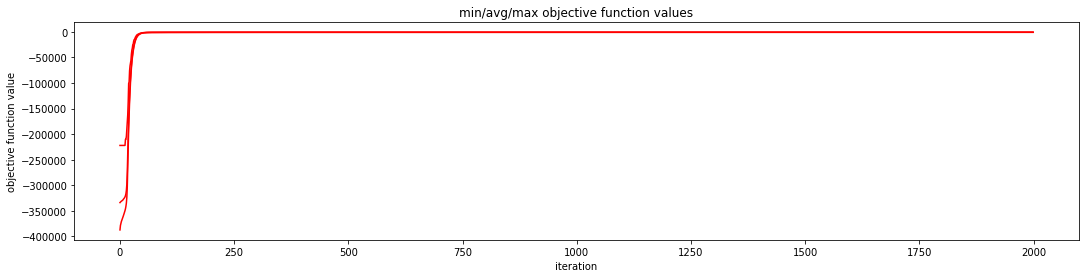

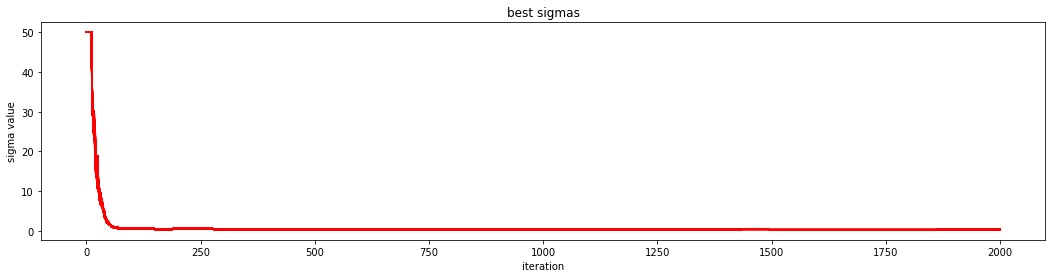

0.45
Iteration 0000 : best score = -250394.79022358, mean score = -331802.89235968.
Iteration 0100 : best score = -814.60698233, mean score = -948.81121128.
Iteration 0200 : best score = -742.77697556, mean score = -880.26061912.
Iteration 0300 : best score = -716.76751016, mean score = -860.44247456.
Iteration 0400 : best score = -716.76751016, mean score = -848.00459922.
Iteration 0500 : best score = -716.76751016, mean score = -840.29601773.
Iteration 0600 : best score = -716.76751016, mean score = -833.79904714.
Iteration 0700 : best score = -711.66696809, mean score = -828.69560724.
Iteration 0800 : best score = -711.66696809, mean score = -824.21783065.
Iteration 0900 : best score = -711.66696809, mean score = -820.40961322.
Iteration 1000 : best score = -711.66696809, mean score = -817.14241510.
Iteration 1100 : best score = -711.66696809, mean score = -814.33808127.
Iteration 1200 : best score = -711.66696809, mean score = -811.50563051.
Iteration 1300 : best score = -711.66696

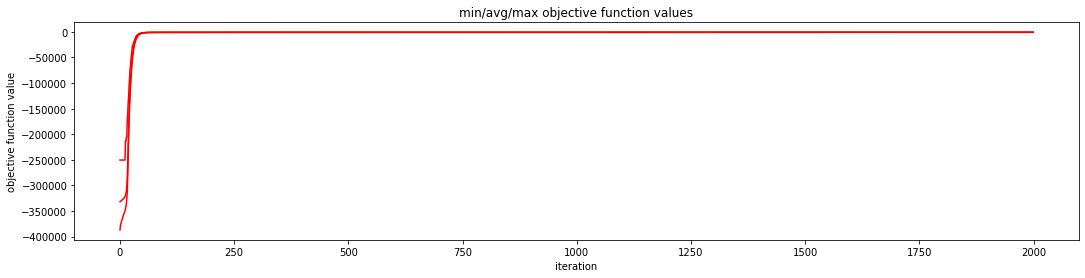

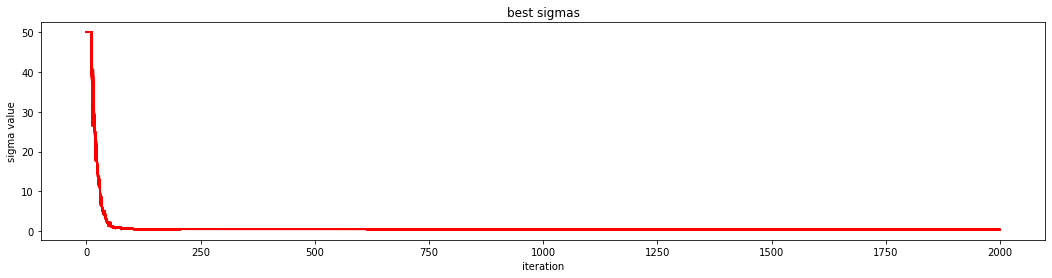

0.45
Iteration 0000 : best score = -239041.54940267, mean score = -334119.24374981.
Iteration 0100 : best score = -801.86717471, mean score = -951.99039254.
Iteration 0200 : best score = -772.32925136, mean score = -885.41087274.
Iteration 0300 : best score = -756.14642902, mean score = -863.99139505.
Iteration 0400 : best score = -740.30005378, mean score = -851.27825434.
Iteration 0500 : best score = -740.30005378, mean score = -842.61101259.
Iteration 0600 : best score = -740.30005378, mean score = -836.34564355.
Iteration 0700 : best score = -740.30005378, mean score = -830.90437892.
Iteration 0800 : best score = -693.10792916, mean score = -826.51128333.
Iteration 0900 : best score = -693.10792916, mean score = -822.73644547.
Iteration 1000 : best score = -693.10792916, mean score = -819.48220044.
Iteration 1100 : best score = -693.10792916, mean score = -816.44979714.
Iteration 1200 : best score = -693.10792916, mean score = -814.09187888.
Iteration 1300 : best score = -693.10792

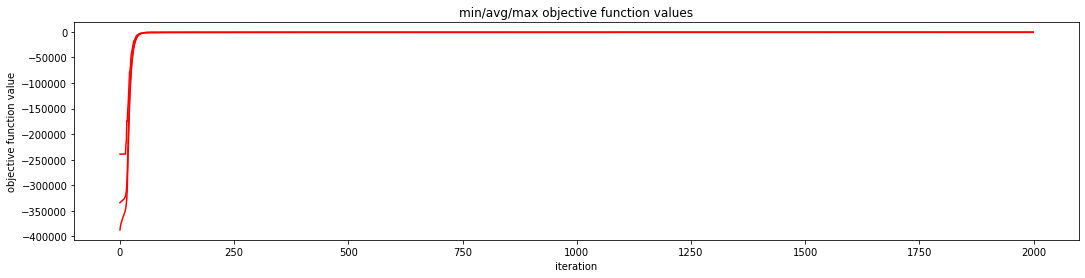

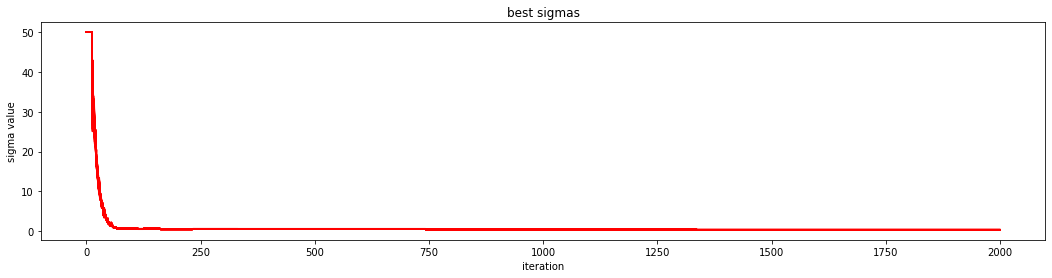





0.49
Iteration 0000 : best score = -240528.92266130, mean score = -331321.27385494.
Iteration 0100 : best score = -844.32184329, mean score = -965.13343646.
Iteration 0200 : best score = -759.32146586, mean score = -897.67887869.
Iteration 0300 : best score = -759.32146586, mean score = -875.08118647.
Iteration 0400 : best score = -754.03457011, mean score = -862.06586250.
Iteration 0500 : best score = -754.03457011, mean score = -852.97595623.
Iteration 0600 : best score = -744.44431639, mean score = -846.32778167.
Iteration 0700 : best score = -734.80142797, mean score = -840.13402238.
Iteration 0800 : best score = -730.95649811, mean score = -834.96382588.
Iteration 0900 : best score = -730.95649811, mean score = -830.54618017.
Iteration 1000 : best score = -730.95649811, mean score = -826.92631471.
Iteration 1100 : best score = -715.47197533, mean score = -823.33697581.
Iteration 1200 : best score = -715.47197533, mean score = -819.69977054.
Iteration 1300 : best score = -214.6

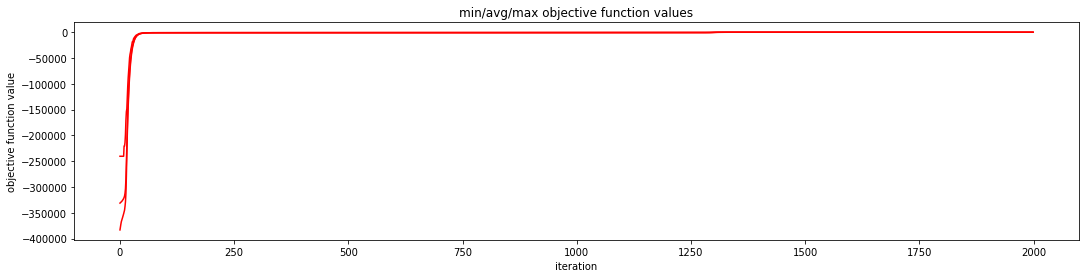

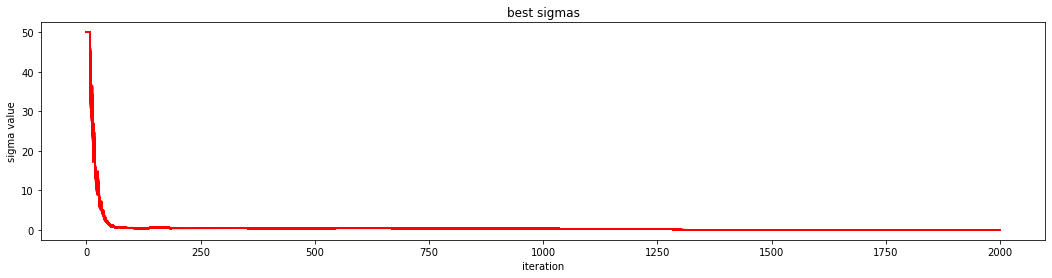

0.49
Iteration 0000 : best score = -229009.87163828, mean score = -332430.11207353.
Iteration 0100 : best score = -833.95334944, mean score = -961.78666701.
Iteration 0200 : best score = -748.38115352, mean score = -891.97743269.
Iteration 0300 : best score = -748.38115352, mean score = -867.75984209.
Iteration 0400 : best score = -748.38115352, mean score = -854.90396821.
Iteration 0500 : best score = -724.62409579, mean score = -846.51685019.
Iteration 0600 : best score = -724.62409579, mean score = -839.94218698.
Iteration 0700 : best score = -724.62409579, mean score = -834.00804276.
Iteration 0800 : best score = -724.15743335, mean score = -829.66885263.
Iteration 0900 : best score = -724.15743335, mean score = -826.20167093.
Iteration 1000 : best score = -724.15743335, mean score = -822.51985011.
Iteration 1100 : best score = -724.15743335, mean score = -819.61956391.
Iteration 1200 : best score = -724.15743335, mean score = -817.24199673.
Iteration 1300 : best score = -724.15743

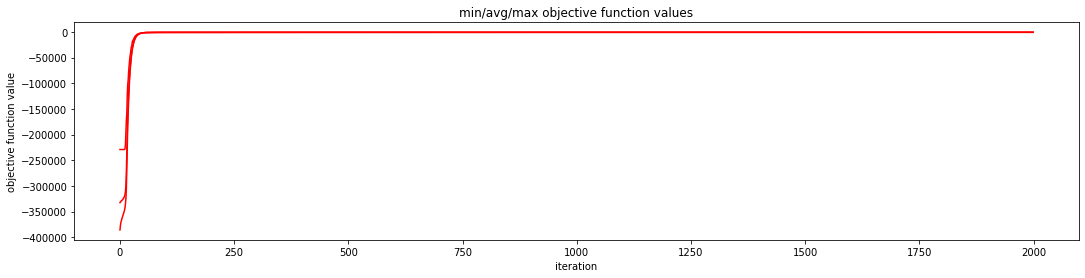

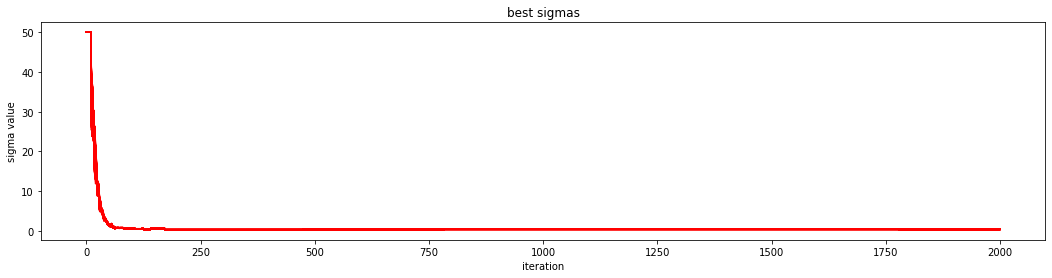

0.49
Iteration 0000 : best score = -235296.76214627, mean score = -333201.95486031.
Iteration 0100 : best score = -834.50982188, mean score = -981.85987186.
Iteration 0200 : best score = -801.21460836, mean score = -911.07962233.
Iteration 0300 : best score = -715.65624459, mean score = -886.69018170.
Iteration 0400 : best score = -715.65624459, mean score = -871.98707435.
Iteration 0500 : best score = -715.65624459, mean score = -862.59837242.
Iteration 0600 : best score = -715.65624459, mean score = -854.77741605.
Iteration 0700 : best score = -715.65624459, mean score = -848.73614898.
Iteration 0800 : best score = -715.65624459, mean score = -843.96726007.
Iteration 0900 : best score = -715.65624459, mean score = -839.70012277.
Iteration 1000 : best score = -715.65624459, mean score = -835.75585817.
Iteration 1100 : best score = -715.65624459, mean score = -832.28607366.
Iteration 1200 : best score = -715.65624459, mean score = -828.94031464.
Iteration 1300 : best score = -715.65624

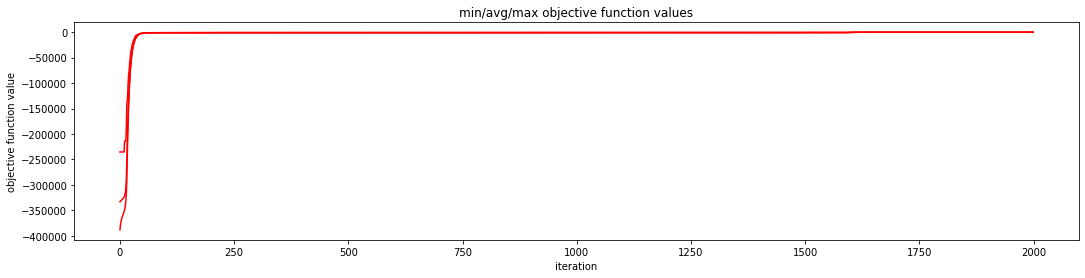

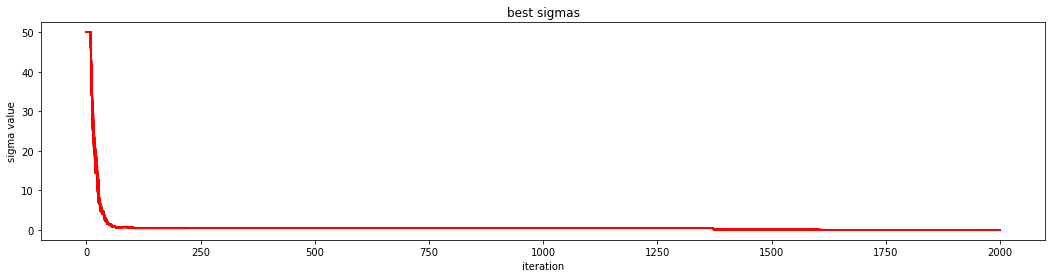





0.5
Iteration 0000 : best score = -225816.23580045, mean score = -332878.50550869.
Iteration 0100 : best score = -832.75928012, mean score = -966.09491104.
Iteration 0200 : best score = -782.05639935, mean score = -894.29069548.
Iteration 0300 : best score = -769.10026629, mean score = -871.21573333.
Iteration 0400 : best score = -765.91696837, mean score = -857.47343444.
Iteration 0500 : best score = -747.46828834, mean score = -848.09286962.
Iteration 0600 : best score = -674.93239599, mean score = -840.46132718.
Iteration 0700 : best score = -674.93239599, mean score = -834.93065738.
Iteration 0800 : best score = -674.93239599, mean score = -830.06095334.
Iteration 0900 : best score = -674.93239599, mean score = -825.76003547.
Iteration 1000 : best score = -674.93239599, mean score = -821.09102456.
Iteration 1100 : best score = -674.93239599, mean score = -816.79996806.
Iteration 1200 : best score = -674.93239599, mean score = -812.39014032.
Iteration 1300 : best score = -87.402

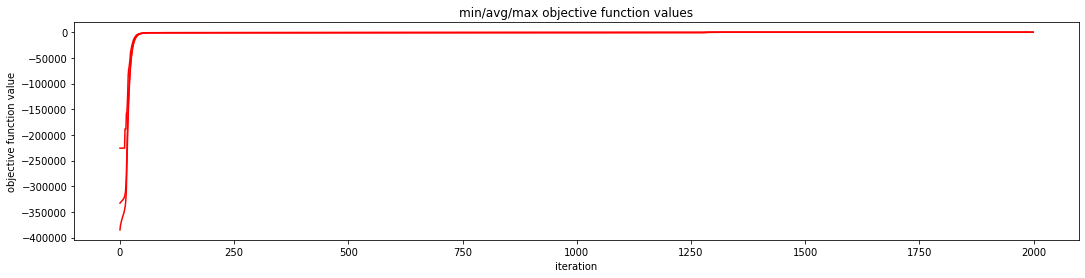

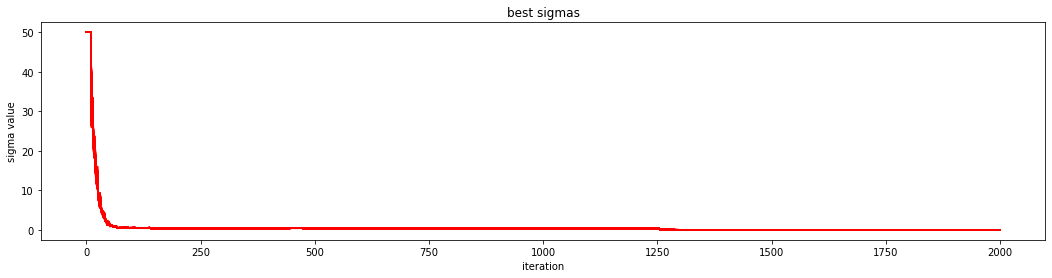

0.5
Iteration 0000 : best score = -227659.67194372, mean score = -333445.94698487.
Iteration 0100 : best score = -837.56898540, mean score = -964.71527586.
Iteration 0200 : best score = -790.85837287, mean score = -898.91448257.
Iteration 0300 : best score = -758.21278486, mean score = -876.59890611.
Iteration 0400 : best score = -738.57565443, mean score = -863.30675480.
Iteration 0500 : best score = -738.57565443, mean score = -853.98897607.
Iteration 0600 : best score = -738.57565443, mean score = -846.75614230.
Iteration 0700 : best score = -732.16650076, mean score = -840.86593153.
Iteration 0800 : best score = -732.16650076, mean score = -836.79141671.
Iteration 0900 : best score = -732.16650076, mean score = -832.81391503.
Iteration 1000 : best score = -718.66504097, mean score = -828.70757782.
Iteration 1100 : best score = -718.66504097, mean score = -825.37312857.
Iteration 1200 : best score = -718.66504097, mean score = -822.45513564.
Iteration 1300 : best score = -718.665040

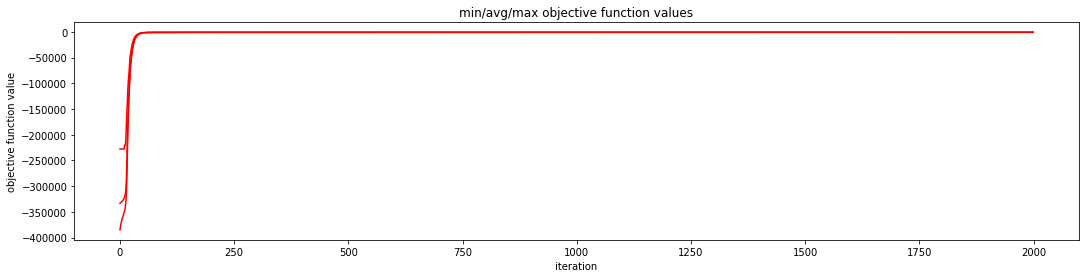

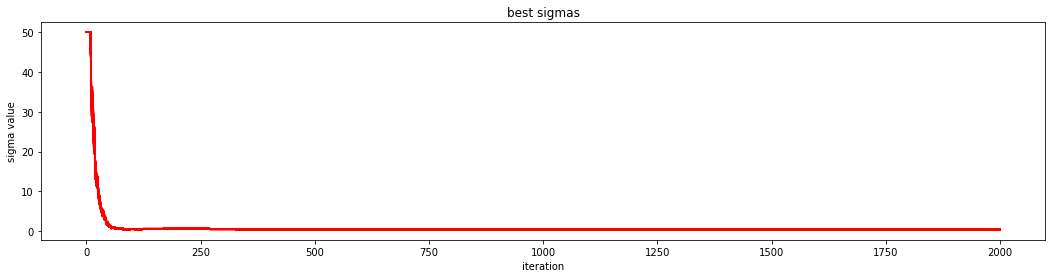

0.5
Iteration 0000 : best score = -235045.84735626, mean score = -331997.88691140.
Iteration 0100 : best score = -847.33048111, mean score = -980.57198080.
Iteration 0200 : best score = -802.81080725, mean score = -906.93103291.
Iteration 0300 : best score = -783.35706872, mean score = -884.76314001.
Iteration 0400 : best score = -763.19128740, mean score = -872.36056988.
Iteration 0500 : best score = -763.19128740, mean score = -861.86142286.
Iteration 0600 : best score = -739.76968735, mean score = -855.03929778.
Iteration 0700 : best score = -739.76968735, mean score = -849.31142919.
Iteration 0800 : best score = -739.76968735, mean score = -843.79585873.
Iteration 0900 : best score = -739.76968735, mean score = -839.51769736.
Iteration 1000 : best score = -739.76968735, mean score = -835.90526484.
Iteration 1100 : best score = -739.76968735, mean score = -832.12083313.
Iteration 1200 : best score = -738.52189681, mean score = -828.53257333.
Iteration 1300 : best score = -738.521896

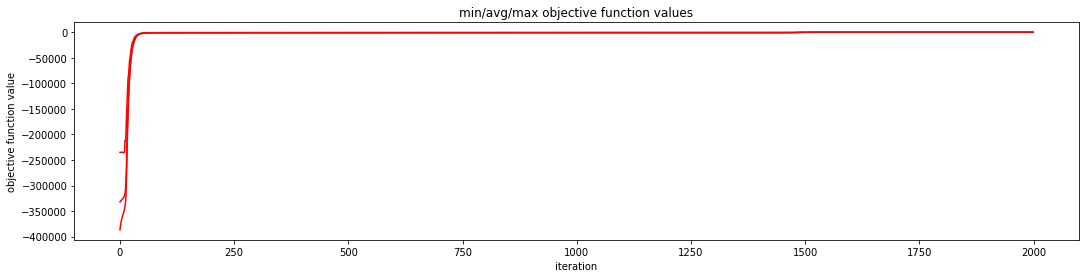

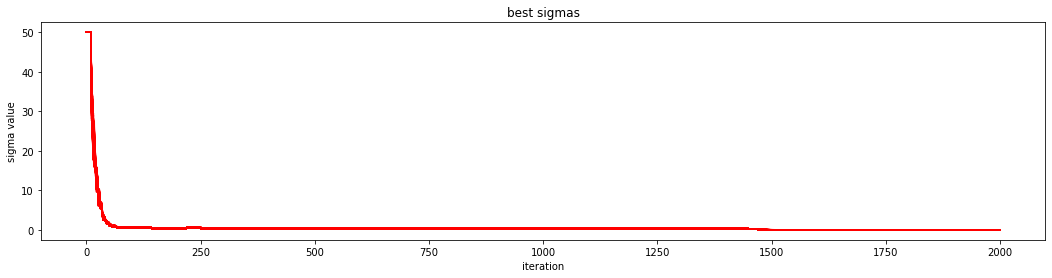





0.51
Iteration 0000 : best score = -227198.83950276, mean score = -333184.35402534.
Iteration 0100 : best score = -837.93531850, mean score = -979.80264600.
Iteration 0200 : best score = -780.20534814, mean score = -906.03187688.
Iteration 0300 : best score = -732.54669626, mean score = -881.71569593.
Iteration 0400 : best score = -732.54669626, mean score = -867.70357179.
Iteration 0500 : best score = -732.54669626, mean score = -857.79363211.
Iteration 0600 : best score = -732.54669626, mean score = -850.30442579.
Iteration 0700 : best score = -732.54669626, mean score = -844.21423674.
Iteration 0800 : best score = -732.54669626, mean score = -839.75506260.
Iteration 0900 : best score = -732.54669626, mean score = -835.11397694.
Iteration 1000 : best score = -732.54669626, mean score = -830.78808778.
Iteration 1100 : best score = -721.15744323, mean score = -824.83545908.
Iteration 1200 : best score = -66.60533414, mean score = -67.28297535.
Iteration 1300 : best score = -62.6824

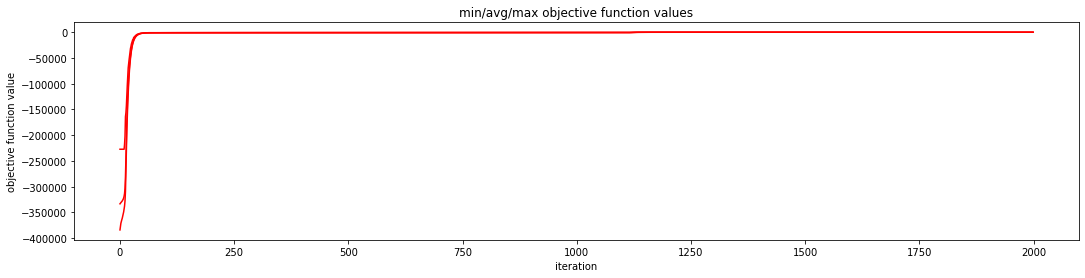

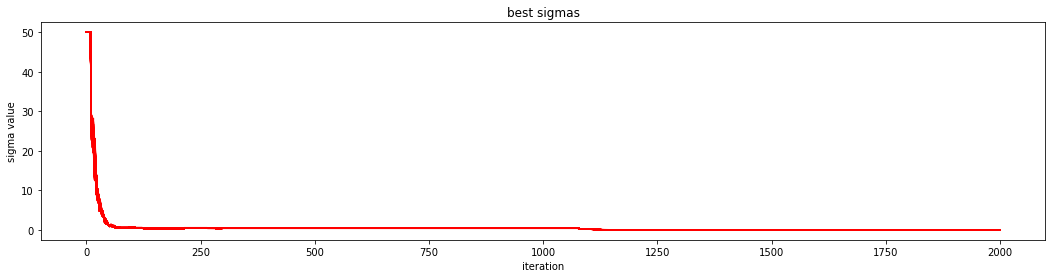

0.51
Iteration 0000 : best score = -243704.07164248, mean score = -333019.40510217.
Iteration 0100 : best score = -877.36107777, mean score = -990.28411387.
Iteration 0200 : best score = -783.15419503, mean score = -908.71059736.
Iteration 0300 : best score = -733.10077831, mean score = -881.83905814.
Iteration 0400 : best score = -716.65167754, mean score = -865.41582189.
Iteration 0500 : best score = -716.65167754, mean score = -854.61062406.
Iteration 0600 : best score = -716.65167754, mean score = -846.03058317.
Iteration 0700 : best score = -716.65167754, mean score = -838.84234691.
Iteration 0800 : best score = -716.65167754, mean score = -831.45449580.
Iteration 0900 : best score = -71.07824285, mean score = -73.11361251.
Iteration 1000 : best score = -62.68243769, mean score = -62.68244492.
Iteration 1100 : best score = -62.68242060, mean score = -62.68242060.
Iteration 1200 : best score = -62.68242060, mean score = -62.68242060.
Iteration 1300 : best score = -62.68242060, mean

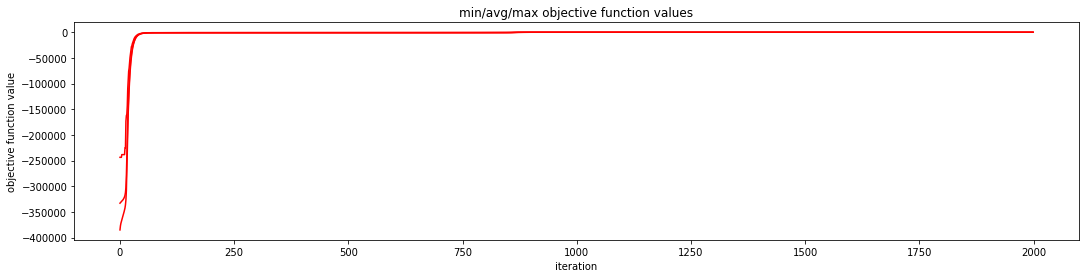

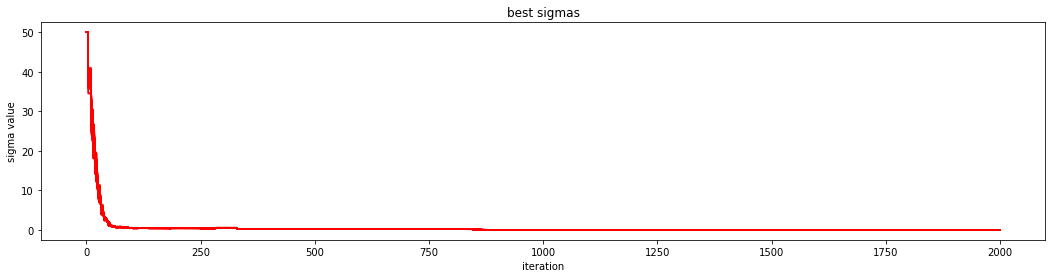

0.51
Iteration 0000 : best score = -216998.19436612, mean score = -333677.89646212.
Iteration 0100 : best score = -875.30142485, mean score = -992.14534626.
Iteration 0200 : best score = -773.11891893, mean score = -912.00014792.
Iteration 0300 : best score = -773.11891893, mean score = -887.26525663.
Iteration 0400 : best score = -773.11891893, mean score = -873.37507179.
Iteration 0500 : best score = -771.09510152, mean score = -864.19627116.
Iteration 0600 : best score = -739.44322569, mean score = -857.11184859.
Iteration 0700 : best score = -739.44322569, mean score = -851.25651869.
Iteration 0800 : best score = -739.44322569, mean score = -846.17024985.
Iteration 0900 : best score = -739.44322569, mean score = -842.46510122.
Iteration 1000 : best score = -739.44322569, mean score = -838.43602051.
Iteration 1100 : best score = -739.44322569, mean score = -835.24774481.
Iteration 1200 : best score = -674.83272212, mean score = -831.97368013.
Iteration 1300 : best score = -674.83272

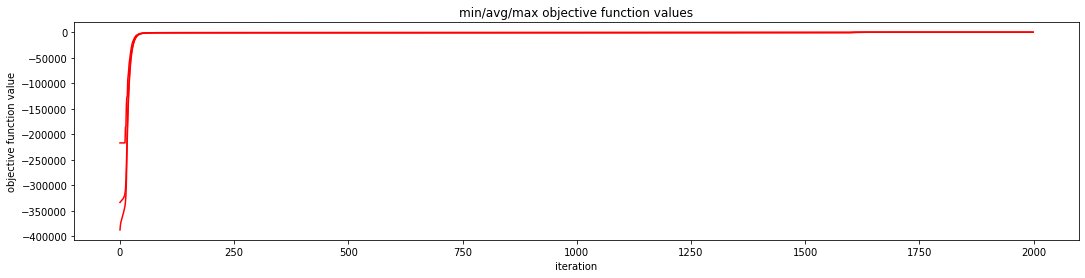

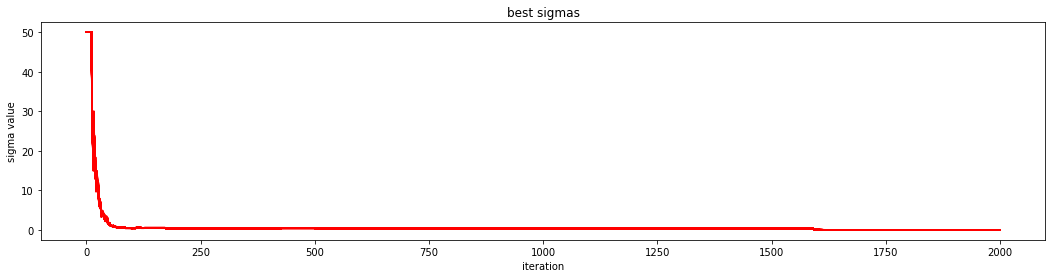





0.52
Iteration 0000 : best score = -238109.71369800, mean score = -332692.09127151.
Iteration 0100 : best score = -812.10571170, mean score = -993.95111660.
Iteration 0200 : best score = -776.10553678, mean score = -916.44798857.
Iteration 0300 : best score = -776.10553678, mean score = -891.60211092.
Iteration 0400 : best score = -757.42331011, mean score = -876.11848136.
Iteration 0500 : best score = -716.81815274, mean score = -861.36941805.
Iteration 0600 : best score = -92.86357230, mean score = -96.66745940.
Iteration 0700 : best score = -74.62199299, mean score = -74.62201276.
Iteration 0800 : best score = -74.62192928, mean score = -74.62192928.
Iteration 0900 : best score = -74.62192928, mean score = -74.62192928.
Iteration 1000 : best score = -74.62192928, mean score = -74.62192928.
Iteration 1100 : best score = -74.62192928, mean score = -74.62192928.
Iteration 1200 : best score = -74.62192928, mean score = -74.62192928.
Iteration 1300 : best score = -74.62192928, mean s

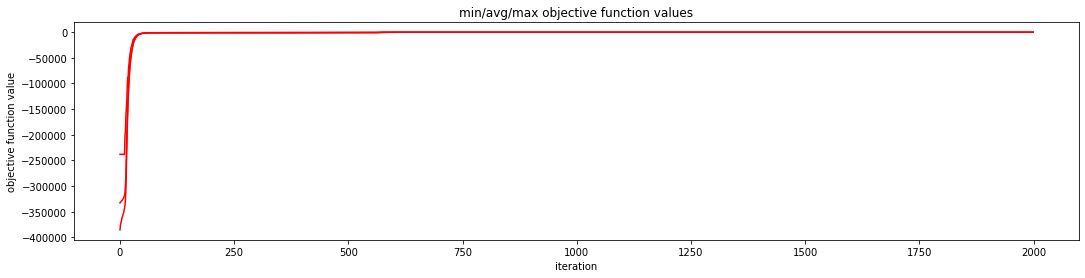

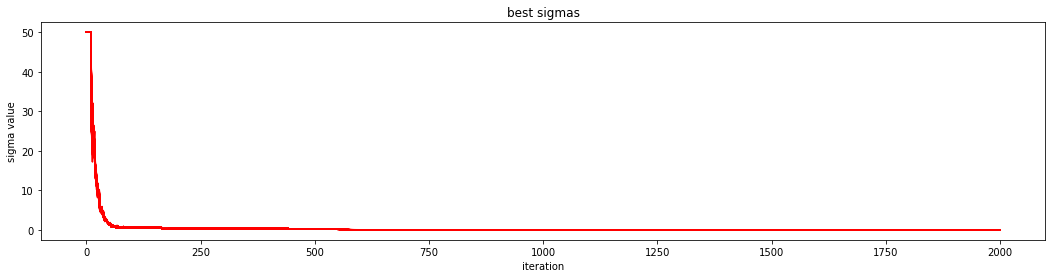

0.52
Iteration 0000 : best score = -229594.88700749, mean score = -332512.24278540.
Iteration 0100 : best score = -844.46882935, mean score = -981.68628404.
Iteration 0200 : best score = -798.48804901, mean score = -908.15891527.
Iteration 0300 : best score = -764.53516804, mean score = -883.06326708.
Iteration 0400 : best score = -764.53516804, mean score = -866.17386379.
Iteration 0500 : best score = -732.18241532, mean score = -852.80444448.
Iteration 0600 : best score = -69.23104466, mean score = -71.18373173.
Iteration 0700 : best score = -62.68243372, mean score = -62.68243795.
Iteration 0800 : best score = -62.68242060, mean score = -62.68242060.
Iteration 0900 : best score = -62.68242060, mean score = -62.68242060.
Iteration 1000 : best score = -62.68242060, mean score = -62.68242060.
Iteration 1100 : best score = -62.68242060, mean score = -62.68242060.
Iteration 1200 : best score = -62.68242060, mean score = -62.68242060.
Iteration 1300 : best score = -62.68242060, mean score

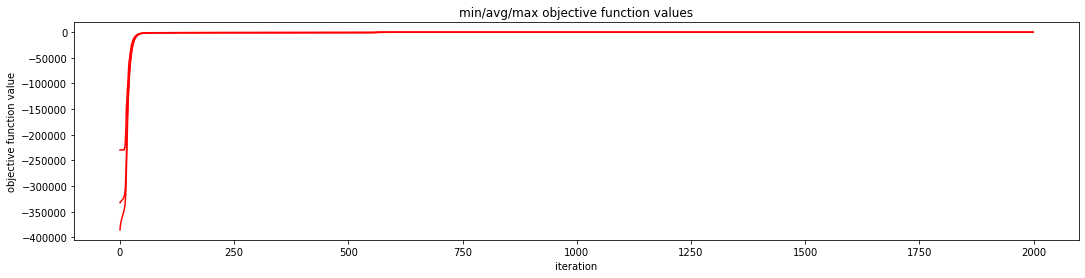

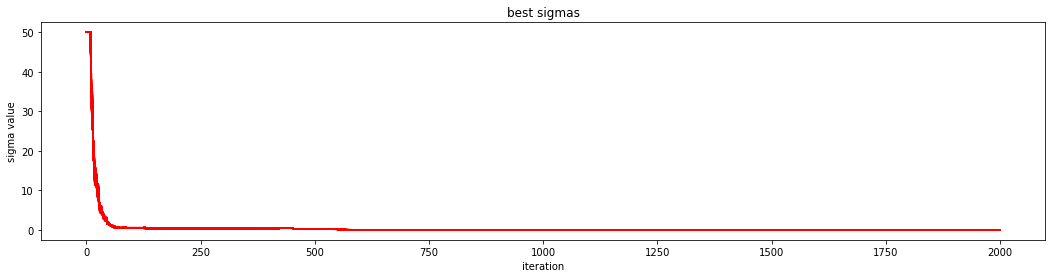

0.52
Iteration 0000 : best score = -229567.10759049, mean score = -334009.20149381.
Iteration 0100 : best score = -835.66300811, mean score = -981.05976007.
Iteration 0200 : best score = -787.88183951, mean score = -909.91020835.
Iteration 0300 : best score = -776.76967530, mean score = -885.87724188.
Iteration 0400 : best score = -744.79087417, mean score = -871.78790997.
Iteration 0500 : best score = -744.79087417, mean score = -859.08815292.
Iteration 0600 : best score = -665.36139290, mean score = -844.34629161.
Iteration 0700 : best score = -75.82440346, mean score = -75.88278503.
Iteration 0800 : best score = -75.61688895, mean score = -75.61688919.
Iteration 0900 : best score = -75.61688834, mean score = -75.61688834.
Iteration 1000 : best score = -75.61688834, mean score = -75.61688834.
Iteration 1100 : best score = -75.61688834, mean score = -75.61688834.
Iteration 1200 : best score = -75.61688834, mean score = -75.61688834.
Iteration 1300 : best score = -75.61688834, mean sco

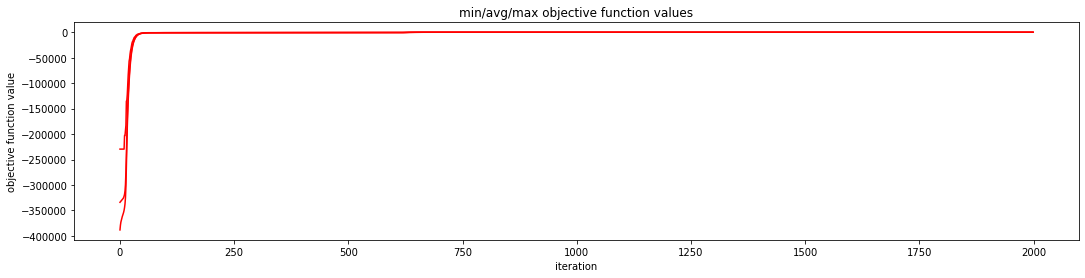

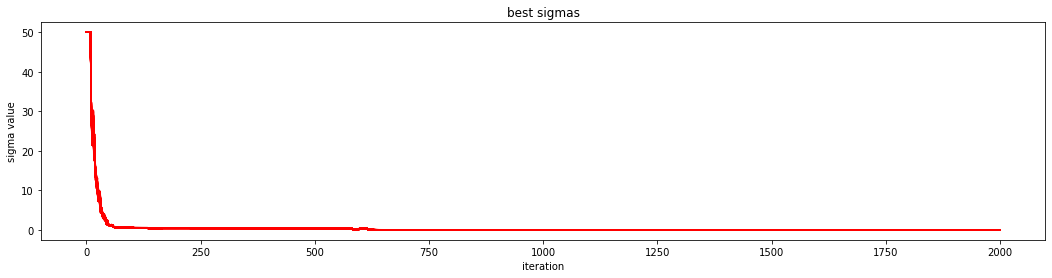





0.6
Iteration 0000 : best score = -231148.15788411, mean score = -333157.28724674.
Iteration 0100 : best score = -901.07415183, mean score = -1069.13167409.
Iteration 0200 : best score = -825.40979414, mean score = -963.96055197.
Iteration 0300 : best score = -144.18971843, mean score = -145.82433711.
Iteration 0400 : best score = -137.30446367, mean score = -137.30452191.
Iteration 0500 : best score = -137.30424913, mean score = -137.30424913.
Iteration 0600 : best score = -137.30424912, mean score = -137.30424912.
Iteration 0700 : best score = -137.30424912, mean score = -137.30424912.
Iteration 0800 : best score = -137.30424912, mean score = -137.30424912.
Iteration 0900 : best score = -137.30424912, mean score = -137.30424912.
Iteration 1000 : best score = -137.30424912, mean score = -137.30424912.
Iteration 1100 : best score = -137.30424912, mean score = -137.30424912.
Iteration 1200 : best score = -137.30424912, mean score = -137.30424912.
Iteration 1300 : best score = -137.3

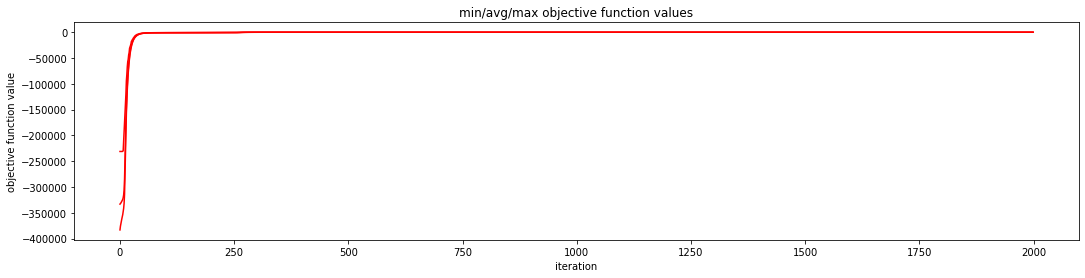

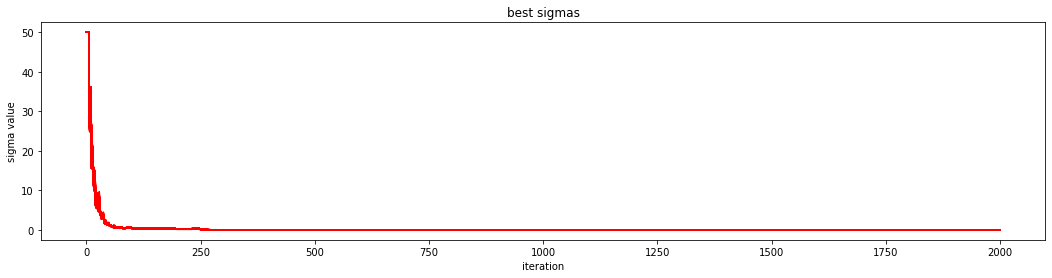

0.6
Iteration 0000 : best score = -242569.19235470, mean score = -333288.05664340.
Iteration 0100 : best score = -922.97173688, mean score = -1062.03460767.
Iteration 0200 : best score = -841.43443791, mean score = -963.16321114.
Iteration 0300 : best score = -279.59295503, mean score = -322.47053746.
Iteration 0400 : best score = -125.36962837, mean score = -125.37177628.
Iteration 0500 : best score = -125.36478090, mean score = -125.36478094.
Iteration 0600 : best score = -125.36478074, mean score = -125.36478074.
Iteration 0700 : best score = -125.36478074, mean score = -125.36478074.
Iteration 0800 : best score = -125.36478074, mean score = -125.36478074.
Iteration 0900 : best score = -125.36478074, mean score = -125.36478074.
Iteration 1000 : best score = -125.36478074, mean score = -125.36478074.
Iteration 1100 : best score = -125.36478074, mean score = -125.36478074.
Iteration 1200 : best score = -125.36478074, mean score = -125.36478074.
Iteration 1300 : best score = -125.36478

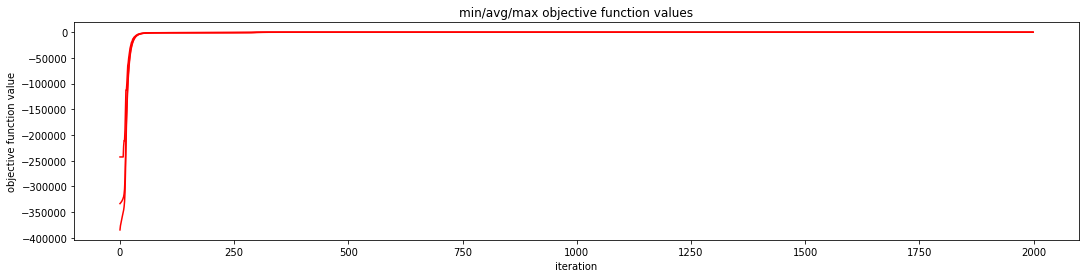

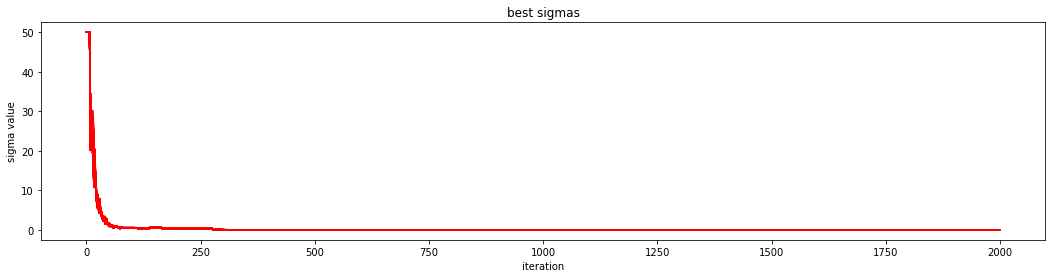

0.6
Iteration 0000 : best score = -225172.51126821, mean score = -331722.12673865.
Iteration 0100 : best score = -929.69653604, mean score = -1065.52436789.
Iteration 0200 : best score = -851.67879710, mean score = -966.70314461.
Iteration 0300 : best score = -677.69532594, mean score = -825.58403465.
Iteration 0400 : best score = -123.44931304, mean score = -123.47861279.
Iteration 0500 : best score = -123.37486837, mean score = -123.37486856.
Iteration 0600 : best score = -123.37486766, mean score = -123.37486766.
Iteration 0700 : best score = -123.37486766, mean score = -123.37486766.
Iteration 0800 : best score = -123.37486766, mean score = -123.37486766.
Iteration 0900 : best score = -123.37486766, mean score = -123.37486766.
Iteration 1000 : best score = -123.37486766, mean score = -123.37486766.
Iteration 1100 : best score = -123.37486766, mean score = -123.37486766.
Iteration 1200 : best score = -123.37486766, mean score = -123.37486766.
Iteration 1300 : best score = -123.37486

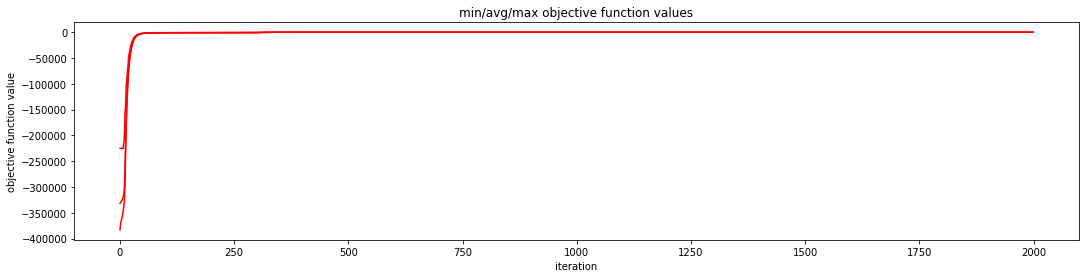

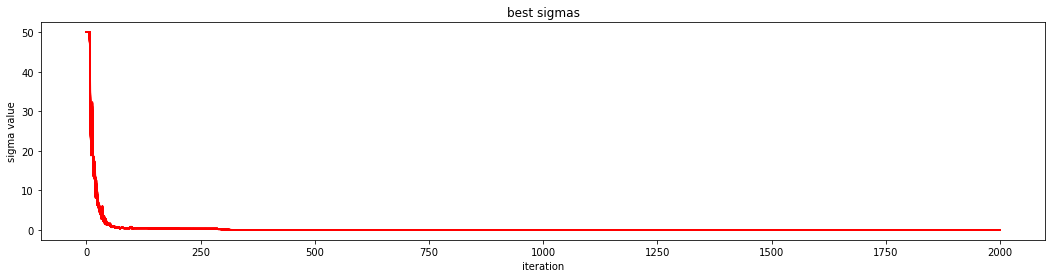

In [213]:
for K in [0.45, 0.49, 0.5, 0.51, 0.52, 0.6]:
    for i in range(3):
        d = 100
        N = 2000
        T = 2000
        print(K)
        best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
            objective_function_F6, d, N, T, 2*N, 2, 50, K/np.sqrt(2*d), K/np.sqrt(2*np.sqrt(d)), 100)

        plt.figure(figsize=(18, 4))
        plt.plot(history_objective_values[:, 0], 'r-')
        plt.plot(history_objective_values[:, 1], 'r-')
        plt.plot(history_objective_values[:, 2], 'r-')
        plt.xlabel('iteration')
        plt.ylabel('objective function value')
        plt.title('min/avg/max objective function values')
        plt.show()

        plt.figure(figsize=(18, 4))
        plt.plot(history_best_sigmas, 'r-')
        plt.xlabel('iteration')
        plt.ylabel('sigma value')
        plt.title('best sigmas')
        plt.show()
    print("\n\n\n")

### Rastrigin d = 100, k = 0.52, sigma = 80

Iteration 0000 : best score = -227724.83370882, mean score = -334422.15948658.
Iteration 0100 : best score = -227724.83370882, mean score = -334263.70410970.
Iteration 0200 : best score = -227724.83370882, mean score = -334138.04283331.
Iteration 0300 : best score = -227724.83370882, mean score = -333983.52252673.
Iteration 0400 : best score = -227724.83370882, mean score = -333820.00357127.
Iteration 0500 : best score = -227724.83370882, mean score = -333662.03353455.
Iteration 0600 : best score = -227724.83370882, mean score = -333510.83964076.
Iteration 0700 : best score = -227724.83370882, mean score = -333320.56552795.
Iteration 0800 : best score = -227724.83370882, mean score = -332798.43497763.
Iteration 0900 : best score = -178925.39187581, mean score = -302495.49179366.
Iteration 1000 : best score = -813.02889297, mean score = -954.33320761.
Iteration 1100 : best score = -771.52349544, mean score = -902.81344611.
Iteration 1200 : best score = -758.35528294, mean score = -882.4

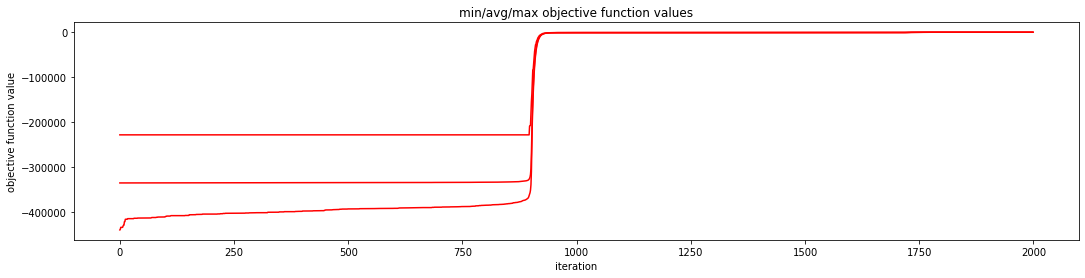

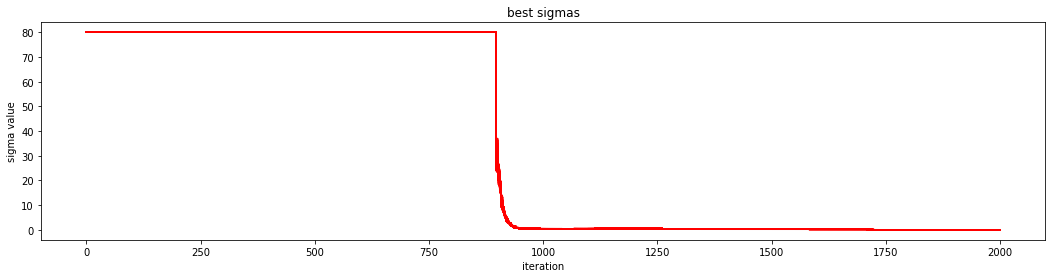

In [292]:
d = 100
N = 2000
T = 2000
best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 80, 0.52/np.sqrt(2*d), 0.52/np.sqrt(2*np.sqrt(d)), 100)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

### Rastrigin d = 50, k = 0.52, sigma = 80

Iteration 0000 : best score = -105852.17149793, mean score = -167408.91575429.
Iteration 0200 : best score = -308.84102901, mean score = -393.40894261.
Iteration 0400 : best score = -287.76016861, mean score = -370.32681161.
Iteration 0600 : best score = -282.27592095, mean score = -360.65969899.
Iteration 0800 : best score = -282.27592095, mean score = -353.80193835.
Iteration 1000 : best score = -265.77189891, mean score = -348.37623475.
Iteration 1200 : best score = -10.94454963, mean score = -10.94454963.
Iteration 1400 : best score = -10.94454963, mean score = -10.94454963.
Iteration 1600 : best score = -10.94454963, mean score = -10.94454963.
Iteration 1800 : best score = -10.94454963, mean score = -10.94454963.
Iteration 2000 : best score = -10.94454963, mean score = -10.94454963.
Iteration 2200 : best score = -10.94454963, mean score = -10.94454963.
Iteration 2400 : best score = -10.94454963, mean score = -10.94454963.
Iteration 2600 : best score = -10.94454963, mean score = -1

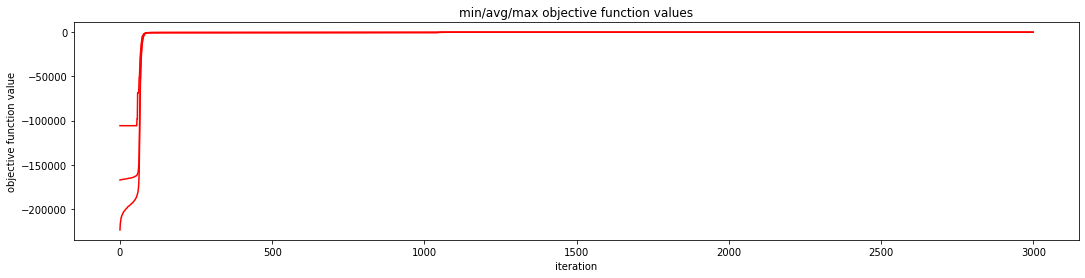

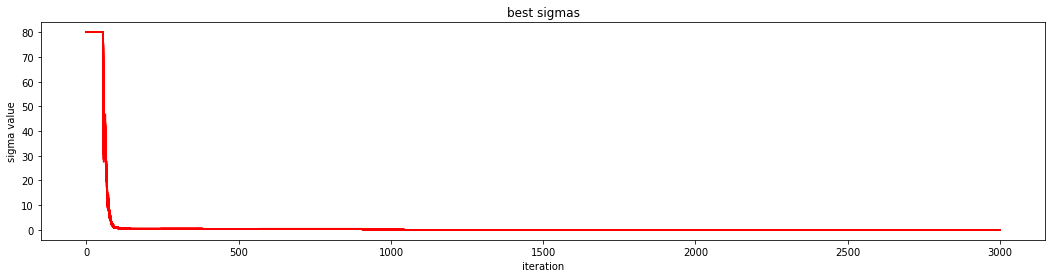

Iteration 0000 : best score = -102833.38628963, mean score = -166519.85736490.
Iteration 0200 : best score = -302.80311944, mean score = -398.44138085.
Iteration 0400 : best score = -276.53793368, mean score = -372.97281814.
Iteration 0600 : best score = -276.53793368, mean score = -362.47960575.
Iteration 0800 : best score = -276.53793368, mean score = -355.83044103.
Iteration 1000 : best score = -276.53793368, mean score = -351.35585747.
Iteration 1200 : best score = -276.53793368, mean score = -347.95617678.
Iteration 1400 : best score = -276.53793368, mean score = -344.95461979.
Iteration 1600 : best score = -276.53793368, mean score = -342.07803794.
Iteration 1800 : best score = -271.68512030, mean score = -337.83358312.
Iteration 2000 : best score = -0.99495906, mean score = -0.99495906.
Iteration 2200 : best score = -0.99495906, mean score = -0.99495906.
Iteration 2400 : best score = -0.99495906, mean score = -0.99495906.
Iteration 2600 : best score = -0.99495906, mean score = -

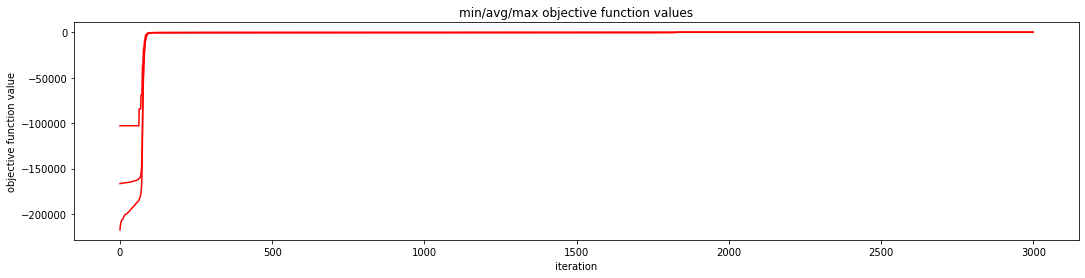

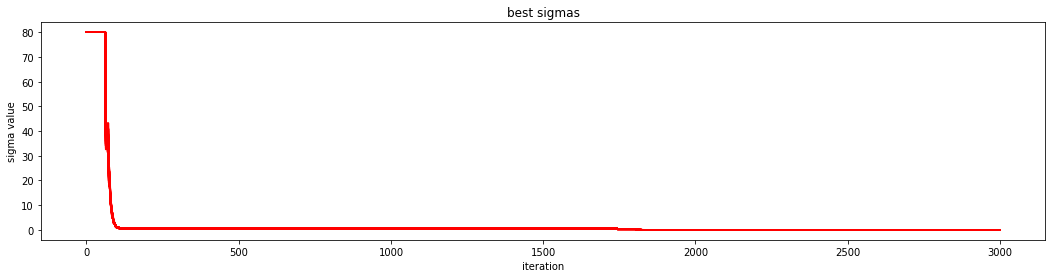

Iteration 0000 : best score = -99982.33768205, mean score = -166654.87227704.
Iteration 0200 : best score = -306.83248465, mean score = -393.24297065.
Iteration 0400 : best score = -291.06877059, mean score = -368.69602840.
Iteration 0600 : best score = -285.07093073, mean score = -358.84755225.
Iteration 0800 : best score = -276.88651785, mean score = -352.63314994.
Iteration 1000 : best score = -276.88651785, mean score = -347.86903811.
Iteration 1200 : best score = -276.88651785, mean score = -343.70764082.
Iteration 1400 : best score = -0.00000146, mean score = -0.00000268.
Iteration 1600 : best score = 0.00000000, mean score = 0.00000000.
Iteration 1800 : best score = 0.00000000, mean score = 0.00000000.
Iteration 2000 : best score = 0.00000000, mean score = 0.00000000.
Iteration 2200 : best score = 0.00000000, mean score = 0.00000000.
Iteration 2400 : best score = 0.00000000, mean score = 0.00000000.
Iteration 2600 : best score = 0.00000000, mean score = 0.00000000.
Iteration 280

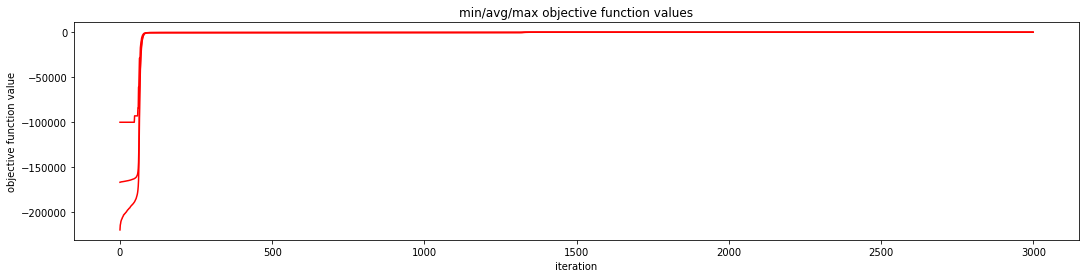

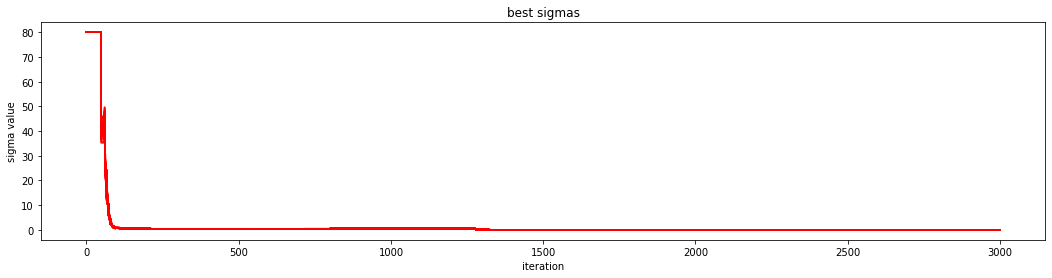

In [42]:
for i in range(3):
    d = 50
    N = 2000
    T = 3000
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function_F6, d, N, T, 2*N, 2, 80, 0.52/np.sqrt(2*d), 0.52/np.sqrt(2*np.sqrt(d)), 200)

    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0], 'r-')
    plt.plot(history_objective_values[:, 1], 'r-')
    plt.plot(history_objective_values[:, 2], 'r-')
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()

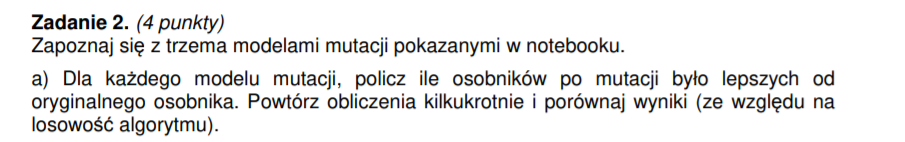

In [460]:
def execute_mutation(mutation_fun, objective_function, chromosome_length, individual):
    vals_before_mutations = objective_function(individual)
    individual = mutation_fun(individual)
    vals_after_mutations = objective_function(individual)
    return int(vals_after_mutations[0] > vals_before_mutations[0]), vals_after_mutations[0]

In [461]:
def test_mutation(mutation_fun, objective_function):
    T = 10000
    res, best = 0, -1e+100
    for i in range(T):
        better_mutations, best_val = execute_mutation(mutation_fun, objective_function, 2, np.array([[1,1]]))
        res += better_mutations
        if best_val > best:
            best = best_val
    print(f"Number of mutations: {T}\nFraction of successful mutations: {res/T}.\nBest value after mutation: {best}")   

In [309]:
def test_mutations(objective_function):
    print("Mutation 1")
    test_mutation(mutation1, objective_function)
    print("\nMutation 2")
    test_mutation(mutation2, objective_function)
    print("\nMutation 3")
    test_mutation(mutation3, objective_function)


$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma^2)$, zaś $\sigma$ jest taka sama dla wszystkich $i = 1, 2, \ldots, d$

In [295]:
def mutation1(population):
    sigma = 0.25
    N, d = len(population), len(population[0])
    return population + sigma * np.random.randn(N, d)

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma_i^2)$, zaś $\sigma_i$ może być różna dla różnych $i = 1, 2, \ldots, d$

In [297]:
def mutation2(population):
    sigma = np.array([0.25, 0.5])
    N, d = len(population), len(population[0])
    return population + sigma * np.random.randn(N, d)

$\mathbf{x} = \mathbf{x} + \boldsymbol{\varepsilon}$, gdzie $\boldsymbol{\varepsilon}$ ma wielowymiarowy rozkład normalny $\mathcal{N}(\mathbf{0}, \boldsymbol{\Sigma})$

In [521]:
def mutation3(population):
    S = np.array([[0.25, 0.25],[0.25, 0.5]])
    N, d = len(population), len(population[0])
    return population + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)

### Sphere

In [523]:
test_mutations(objective_function_F1)

Mutation 1
Number of mutations: 10000
Fraction of successful mutations: 0.4586.
Best value after mutation: -0.23042137440167984

Mutation 2
Number of mutations: 10000
Fraction of successful mutations: 0.4582.
Best value after mutation: -0.06428864738137322

Mutation 3
Number of mutations: 10000
Fraction of successful mutations: 0.4781.
Best value after mutation: -0.00019424104549798775


### Sphere a

In [474]:
test_mutations(objective_function_F1a)

Mutation 1
Number of mutations: 10000
Fraction of successful mutations: 0.4945.
Best value after mutation: -0.5445091535709501

Mutation 2
Number of mutations: 10000
Fraction of successful mutations: 0.4965.
Best value after mutation: -0.1399727147481877

Mutation 3
Number of mutations: 10000
Fraction of successful mutations: 0.4927.
Best value after mutation: -0.000635771323233628


### Schwefel

In [464]:
test_mutations(objective_function_F7)

Mutation 1
Number of mutations: 10000
Fraction of successful mutations: 0.5082.
Best value after mutation: -834.8711680107385

Mutation 2
Number of mutations: 10000
Fraction of successful mutations: 0.5063.
Best value after mutation: -833.8405018671571

Mutation 3
Number of mutations: 10000
Fraction of successful mutations: 0.497.
Best value after mutation: -831.8264254058504


### Griewank

In [465]:
test_mutations(objective_function_F8)

Mutation 1
Number of mutations: 10000
Fraction of successful mutations: 0.4566.
Best value after mutation: -0.0701785674649531

Mutation 2
Number of mutations: 10000
Fraction of successful mutations: 0.4338.
Best value after mutation: -0.04120939589602912

Mutation 3
Number of mutations: 10000
Fraction of successful mutations: 0.476.
Best value after mutation: -8.010007113512518e-05


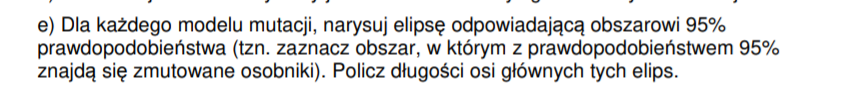

In [469]:
functions = [objective_function_F8]

In [481]:
original_individual = np.array([[1, 1]])

In [501]:
mutations = np.array([mutation1(original_individual).ravel() for _ in range(1000)])

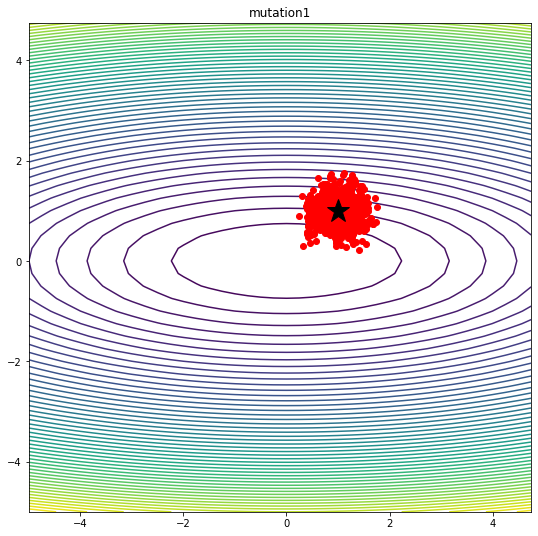

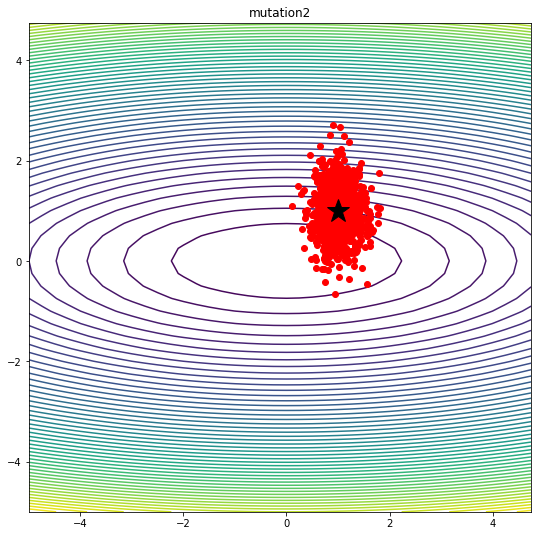

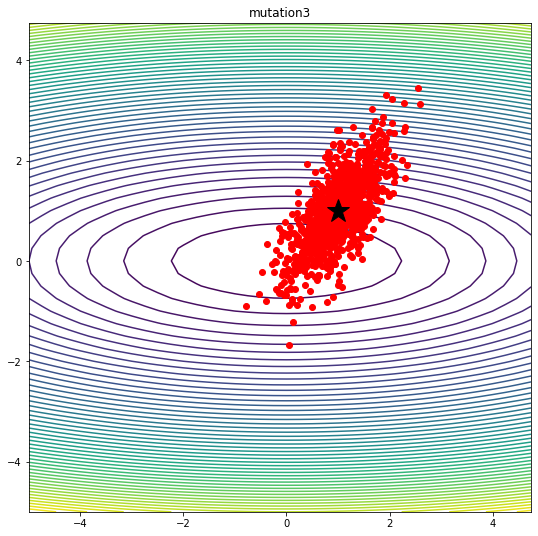

In [522]:
for mutation_fun in [mutation1, mutation2, mutation3]:
    original_individual = np.array([[1, 1]])
    mutations = np.array([mutation_fun(original_individual).ravel() for _ in range(1000)])
    domain_X = np.arange(-5, 5, 0.25)
    domain_Y = np.arange(-5, 5, 0.25)
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function_F1a(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

    plt.figure(figsize=(9, 9))
    plt.contour(X, Y, Z, 50)
    plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
    plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
    plt.title(mutation_fun.__name__)
    plt.show()

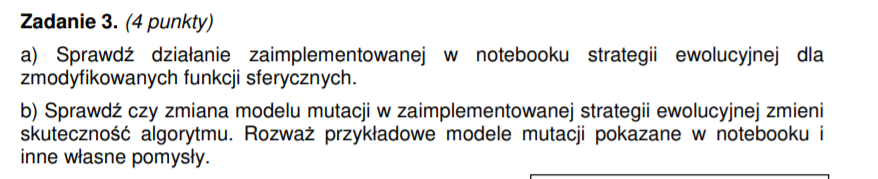

In [643]:
def mutation1(pop_sol, pop_sigmas, number_of_offspring, chromosome_length):
    sigmas = np.array([pop_sigmas[:, 0]]).T
    return pop_sol + sigmas * np.random.randn(number_of_offspring, chromosome_length)

def mutation2(pop_sol, pop_sigmas, number_of_offspring, chromosome_length):
    return pop_sol + pop_sigmas * np.random.randn(number_of_offspring, chromosome_length)

def mutation3(pop_sol, pop_sigmas, number_of_offspring, chromosome_length):
    sigma = np.cov(pop_sigmas.T)
    return pop_sol + np.dot(np.random.randn(number_of_offspring, chromosome_length), np.linalg.cholesky(sigma).T)

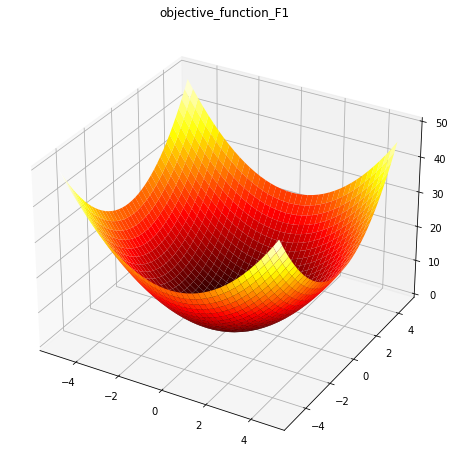

mutation1
d = 100, N = 2000, T = 500
Iteration 0000 : best score = -238220.49002206, mean score = -331869.64161124.
Iteration 0100 : best score = -7.18516658, mean score = -8.80269165.
Iteration 0200 : best score = -0.00038118, mean score = -0.00046411.
Iteration 0300 : best score = -0.00000002, mean score = -0.00000003.
Iteration 0400 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0499 : best score = -0.00000000, mean score = -0.00000000.
mutation2
d = 100, N = 2000, T = 500
Iteration 0000 : best score = -255885.84831958, mean score = -332029.39555560.
Iteration 0100 : best score = -4.09156346, mean score = -5.06268648.
Iteration 0200 : best score = -0.00013789, mean score = -0.00018450.
Iteration 0300 : best score = -0.00000001, mean score = -0.00000001.
Iteration 0400 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0499 : best score = -0.00000000, mean score = -0.00000000.
mutation3
d = 100, N = 2000, T = 500
Iteration 0000 : best score = -106414.361

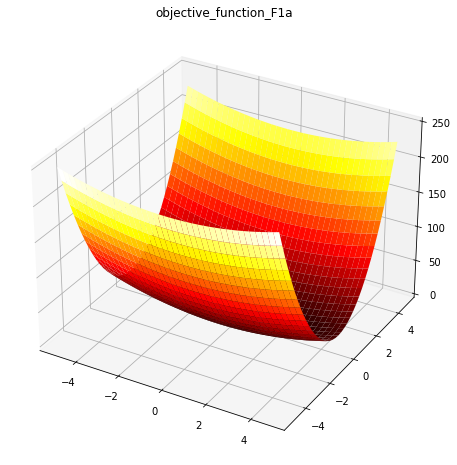

mutation1
d = 100, N = 2000, T = 500
Iteration 0000 : best score = -1.90732033, mean score = -6710.35427455.
Iteration 0100 : best score = -0.02058118, mean score = -22.01916056.
Iteration 0200 : best score = -0.02058118, mean score = -9.77550073.
Iteration 0300 : best score = -0.00240881, mean score = -6.07475880.
Iteration 0400 : best score = -0.00240881, mean score = -4.38446618.
Iteration 0499 : best score = -0.00039325, mean score = -3.39867029.
mutation2
d = 100, N = 2000, T = 500
Iteration 0000 : best score = -2.73386982, mean score = -6560.12712436.
Iteration 0100 : best score = -0.05208934, mean score = -24.13111611.
Iteration 0200 : best score = -0.03539151, mean score = -10.61286521.
Iteration 0300 : best score = -0.02774531, mean score = -6.76669590.
Iteration 0400 : best score = -0.01510136, mean score = -4.95370800.
Iteration 0499 : best score = -0.00826566, mean score = -3.83306019.
mutation3
d = 100, N = 2000, T = 500
Iteration 0000 : best score = -14.46797731, mean sco

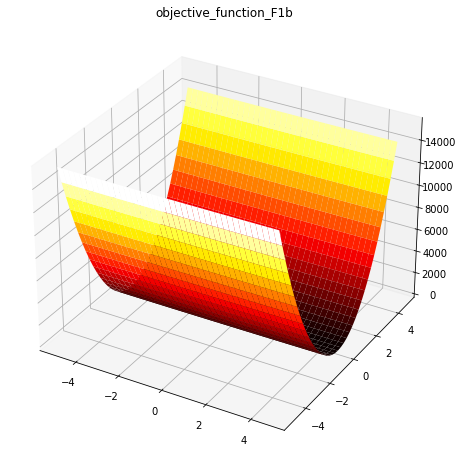

mutation1
d = 100, N = 2000, T = 500
Iteration 0000 : best score = -127.76692314, mean score = -210323.92462191.
Iteration 0100 : best score = -0.06892402, mean score = -222.96953786.
Iteration 0200 : best score = -0.06892402, mean score = -93.18569599.
Iteration 0300 : best score = -0.06892402, mean score = -55.88979209.
Iteration 0400 : best score = -0.04828026, mean score = -39.93295004.
Iteration 0499 : best score = -0.04828026, mean score = -30.37702792.
mutation2
d = 100, N = 2000, T = 500
Iteration 0000 : best score = -31.64764241, mean score = -182333.36615632.
Iteration 0100 : best score = -0.01992629, mean score = -222.85508766.
Iteration 0200 : best score = -0.01992629, mean score = -93.67521622.
Iteration 0300 : best score = -0.01992629, mean score = -56.68424457.
Iteration 0400 : best score = -0.01951789, mean score = -40.83451731.
Iteration 0499 : best score = -0.01951789, mean score = -30.93783987.
mutation3
d = 100, N = 2000, T = 500
Iteration 0000 : best score = -22.82

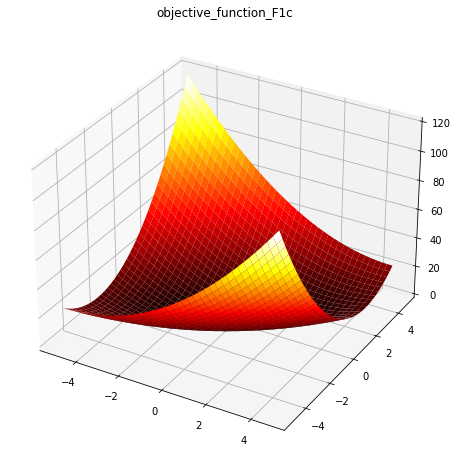

mutation1
d = 100, N = 2000, T = 500
Iteration 0000 : best score = -2.95301943, mean score = -1735.46216020.
Iteration 0100 : best score = -0.00327192, mean score = -7.30220030.
Iteration 0200 : best score = -0.00251744, mean score = -3.23736988.
Iteration 0300 : best score = -0.00121532, mean score = -1.92586331.
Iteration 0400 : best score = -0.00121532, mean score = -1.38303772.
Iteration 0499 : best score = -0.00121532, mean score = -1.08622501.
mutation2
d = 100, N = 2000, T = 500
Iteration 0000 : best score = -5.58884027, mean score = -1732.72101680.
Iteration 0100 : best score = -0.01711297, mean score = -7.61940937.
Iteration 0200 : best score = -0.00074246, mean score = -3.46525646.
Iteration 0300 : best score = -0.00074246, mean score = -2.13455651.
Iteration 0400 : best score = -0.00074246, mean score = -1.52252928.
Iteration 0499 : best score = -0.00074246, mean score = -1.21091878.
mutation3
d = 100, N = 2000, T = 500
Iteration 0000 : best score = -0.97432262, mean score =

In [676]:
for sphere_fun in [objective_function_F1, objective_function_F1a, objective_function_F1b, objective_function_F1c]:
    plot_3D_benchmark_function(sphere_fun, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), sphere_fun.__name__)
    for mut_fun in [mutation1, mutation2, mutation3]:
        d = 100
        N = 2000
        T = 500
        print(f"{mut_fun.__name__}\nd = {d}, N = {N}, T = {T}")
        best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
            sphere_fun, d, N, T, 2*N, 2, 50, 0.6/np.sqrt(2*d), 0.6/np.sqrt(2*np.sqrt(d)), 100, mutation_fun = mut_fun)
    print('\n\n')